In [147]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pprint
pp = pprint.PrettyPrinter(indent=4)

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("OSX_DS_assignment.csv")

In [3]:
df.head()

user_name   country                                       review_title  \
0  @kerinokeefe     Italy                  Nicosia 2013 Vulkà Bianco  (Etna)   
1    @vossroger  Portugal      Quinta dos Avidagos 2011 Avidagos Red (Douro)   
2   @paulgwine         US      Rainstorm 2013 Pinot Gris (Willamette Valley)   
3           NaN        US  St. Julian 2013 Reserve Late Harvest Riesling ...   
4   @paulgwine         US  Sweet Cheeks 2012 Vintner's Reserve Wild Child...   

                                  review_description  \
0  Aromas include tropical fruit, broom, brimston...   
1  This is ripe and fruity, a wine that is smooth...   
2  Tart and snappy, the flavors of lime flesh and...   
3  Pineapple rind, lemon pith and orange blossom ...   
4  Much like the regular bottling from 2012, this...   

                          designation  points  price           province  \
0                        Vulkà Bianco      87    NaN  Sicily & Sardinia   
1                            Avidagos      87   15.0              Douro   
2                                 NaN      87   14.0             Oregon   
3                Reserve Late Harvest      87   13.0           Michigan   
4  Vintner's Reserve Wild Child Block      87   65.0             Oregon   

              region_1           region_2               winery         variety  
0                 Etna                NaN              Nicosia     White Blend  
1                  NaN                NaN  Quinta dos Avidagos  Portuguese Red  
2    Willamette Valley  Willamette Valley            Rainstorm      Pinot Gris  
3  Lake Michigan Shore                NaN           St. Julian        Riesling  
4    Willamette Valley  Willamette Valley         Sweet Cheeks      Pinot Noir

# Data Exploration

<AxesSubplot:title={'center':'wine ratings distribution'}, xlabel='Count', ylabel='Wine Variety'>

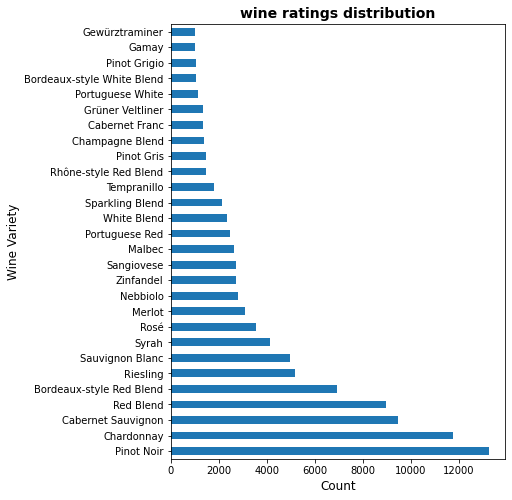

In [4]:
# plt.hist(df.variety,yc,ec='black',align='center')
# plt.xticks(rotation=90)
# plt.plot()

# print(df.variety.unique().shape[0])
# df.variety.value_counts().plot(kind='barh',figsize=(6,8))

fig, ax = plt.subplots(figsize=(6,8))

# plt.xticks(fontsize=15)
ax.set_xlabel('Count',fontsize=12) 
# plt.yticks(fontsize=15) 
ax.set_ylabel('Wine Variety',fontsize=12) 

ax.set_title('wine ratings distribution', fontweight="bold", size=14) 
df.variety.value_counts().plot(ax=ax, kind='barh')

We have 28 different varieties of wines. Out of which Pinot Noir was the highest rated wine (which indiates that it might be the wine that most people purchased), and Gewurtraminer is the lowest rated.

In [5]:
# naCols = df.columns[df.isna().any()]
# print("Columns having missing values: \n",naCols.values)
# notNaCols = df.columns[~df.isna().any()]
# print("\nColumns not having any missing values: \n",notNaCols.values)

df.isnull().any().sort_values()

review_title          False
review_description    False
points                False
winery                False
variety               False
user_name              True
country                True
designation            True
price                  True
province               True
region_1               True
region_2               True
dtype: bool

There are 5 columns that need to be pre-prpocessed. The output column variety does not have any missing values.

## Exploring Columns data that do not have missing values

### exploring points

[]

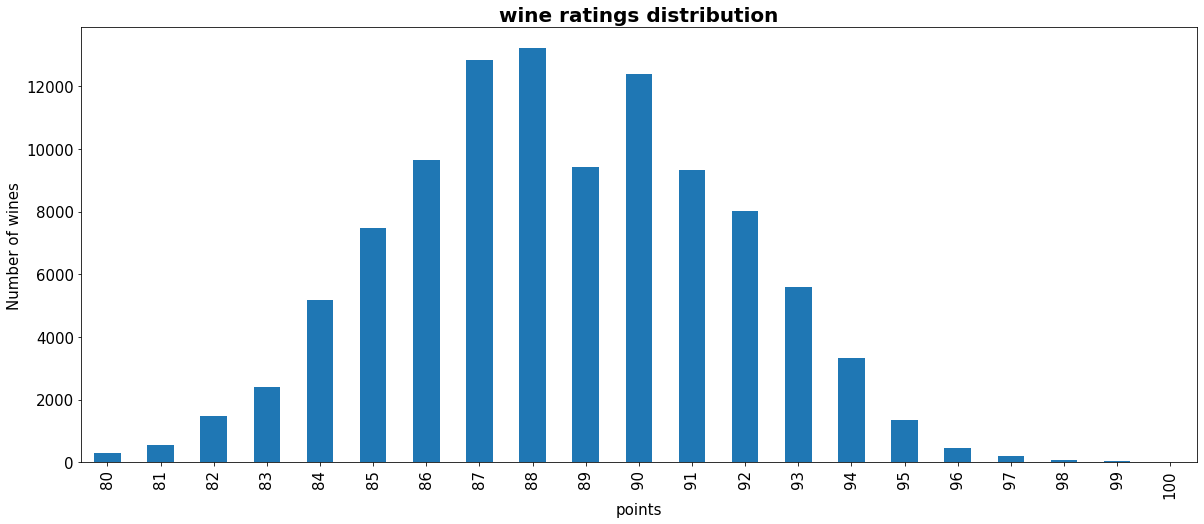

In [6]:

# ptcounts = df.points.value_counts()
# # print(ptcounts)
# plt.hist(df.points,bins=20,ec='black')
# plt.plot()

fig, ax = plt.subplots(figsize=(20,8))

plt.xticks(fontsize=15) 
ax.set_xlabel('Points', fontsize = 15) 
plt.yticks(fontsize=15) 
ax.set_ylabel('Number of wines', fontsize = 15) 

ax.set_title('wine ratings distribution', fontweight="bold", size=20) 
df.groupby(['points']).count()['review_description'].plot(ax=ax, kind='bar')
plt.plot()

Minimum rating given to any wine is 80 while the highest is 100. There are 20 different ratings. Let's simplify this a bit so that we can consolidate the insight

Let’s try to simplify this value by categorizing rating in major groups defined by <a href="https://www.winemag.com/2019/01/02/wine-vintage-chart-2019/">Vintage Chart</a>:

1 &#8594; Points 80 to 82 (Acceptable)<br>
2 &#8594; Points 83 to 86 (Good)<br>
3 &#8594; Points 87 to 89 (Very good)<br>
4 &#8594; Points 90 to 93 (Excellent)<br>
5 &#8594; Points 94 to 97 (Suparb)<br>
6 &#8594; Points 98 to 100 (Classic)<br>

<AxesSubplot:title={'center':'wine ratings distribution'}, xlabel='point_groups', ylabel='Number of wines'>

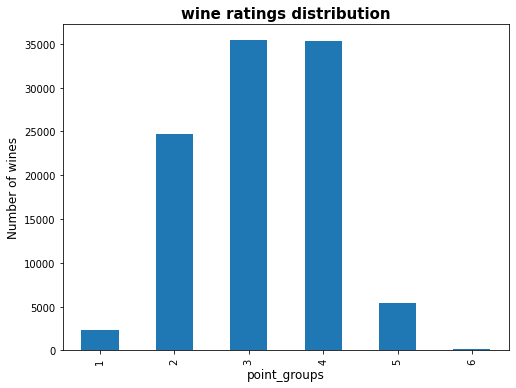

In [26]:
pt_bins = [79,82,86,89,93,97,100]
pt_labels = [1,2,3,4,5,6]
df['point_groups'] = pd.cut(df['points'], bins=pt_bins, labels=pt_labels) #create bins of range (a,b]


fig, ax = plt.subplots(figsize=(8,6))

plt.xticks(fontsize=10) 
ax.set_xlabel('Points', fontsize = 12) 
plt.yticks(fontsize=10) 
ax.set_ylabel('Number of wines', fontsize = 12) 

ax.set_title('wine ratings distribution', fontweight="bold", size=15) 
df.groupby(['point_groups']).count()['review_description'].plot(ax=ax, kind='bar')

This indicates that most of the reviews are between 82 and 93.

In [29]:
#verifying whether bins were correctly made or not

df[['point_groups','points']].groupby(['point_groups']).agg(['min','max','count'])

points            
                min  max  count
point_groups                   
1                80   82   2319
2                83   86  24751
3                87   89  35472
4                90   93  35304
5                94   97   5367
6                98  100    109

### Let's plot the points against the variety.

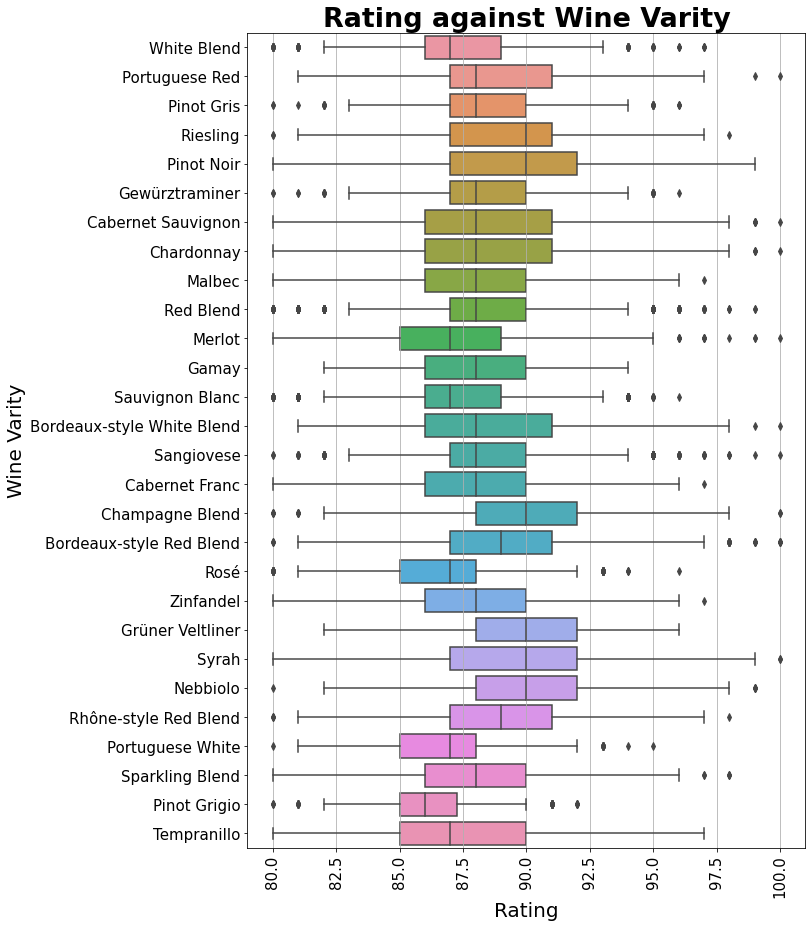

In [474]:
fig, ax = plt.subplots(figsize=(10,15))
sns.boxplot(x='points', y='variety', data=df)
# sns.swarmplot(x="variety", y="points", data=df,
#               size=2, color=".3", linewidth=0)

plt.xticks(fontsize=15,rotation=90)
ax.set_xlabel('Rating', fontsize = 20)
plt.yticks(fontsize=15)
ax.set_ylabel('Wine Varity', fontsize = 20)


ax.set_title('Rating against Wine Varity', fontweight="bold", size=27)
ax.xaxis.grid(True)
# sns.despine(trim=True, left=True)
plt.show()

## This plot provides us following information

1. Median rating for any variety is at most 90 and at least approx 86.

2. There are some varities of wines that are given ratings that are beyond their typical range. i.e. outliers

3. 80 is the minimum rating given to any wine while 100 is the maximum

4. 9 types of wines were given the highest rating in at least one review

5. 24 out of 28 wines were given the lowest rating in at least one review

<AxesSubplot:title={'center':'Highest rated wines'}, xlabel='Count', ylabel='Wine Variety'>

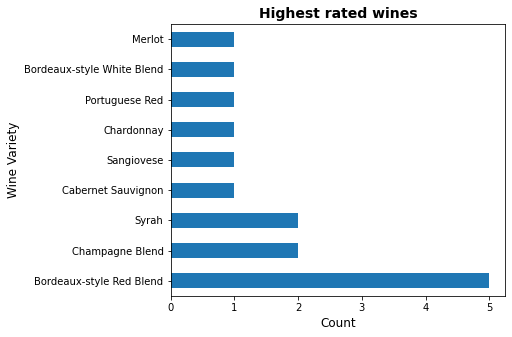

In [11]:
highest_rated_varieties = df[df.points == df.points.max()].variety.value_counts()
# print(highest_rated_varieties,highest_rated_varieties.shape)
# highest_rated_varieties.plot(kind="barh")


fig, ax = plt.subplots(figsize=(6,5))

# plt.xticks(fontsize=15)
ax.set_xlabel('Count',fontsize=12) 
# plt.yticks(fontsize=15) 
ax.set_ylabel('Wine Variety',fontsize=12) 

ax.set_title('Highest rated wines', fontweight="bold", size=14) 
highest_rated_varieties.plot(ax=ax, kind='barh')

Amongst these top varieties, 
<i>Bordeaux-style Red Blend</i> was given the highest score. followed by <i>Champagne Blend</i> and <i>Syrah</i>

<AxesSubplot:title={'center':'Lowest rated wines'}, xlabel='Count', ylabel='Wine Variety'>

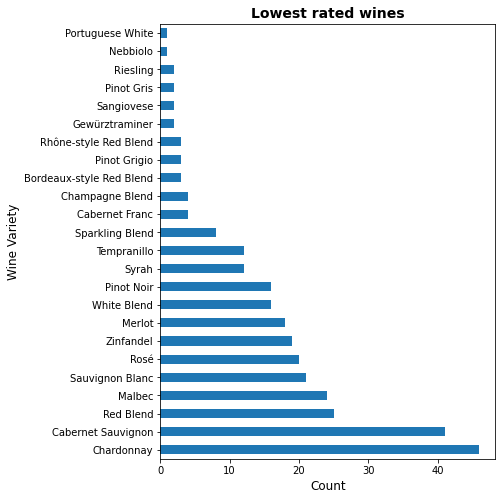

In [12]:
lowest_rated_varieties = df[df.points == df.points.min()].variety.value_counts()
# print(lowest_rated_varieties,lowest_rated_varieties.shape)
# lowest_rated_varieties.plot(kind="barh",figsize=(6,8))


fig, ax = plt.subplots(figsize=(6,8))

# plt.xticks(fontsize=15)
ax.set_xlabel('Count',fontsize=12) 
# plt.yticks(fontsize=15) 
ax.set_ylabel('Wine Variety',fontsize=12) 

ax.set_title('Lowest rated wines', fontweight="bold", size=14) 
lowest_rated_varieties.plot(ax=ax, kind='barh')

Amongst these lowest varieties, Chardonnay receieved the lowest score of 80 most of the time.

### Exploring description length

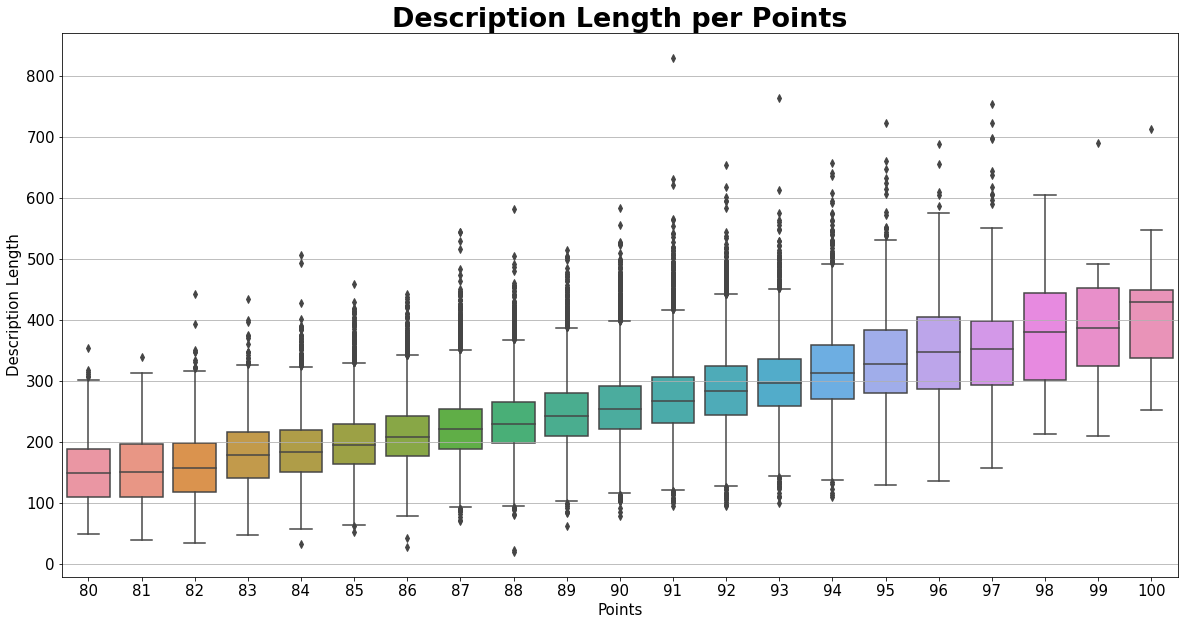

In [13]:
df['desc_len'] = df['review_description'].apply(lambda x: len(x))

fig, ax = plt.subplots(figsize=(20,10))
sns.boxplot(x='points', y='desc_len', data=df)

plt.xticks(fontsize=15)
ax.set_xlabel('Points', fontsize = 15)
plt.yticks(fontsize=15)
ax.set_ylabel('Description Length', fontsize = 15)


ax.set_title('Description Length per Points', fontweight="bold", size=27)
ax.yaxis.grid(True)
plt.show()

This graph provides us following insights:

1. Wines with a high score tend to have more description
2. Wines with a low score have smaller description
3. As we know that most reviews are between 82 and 93, they have higher no of outliers.

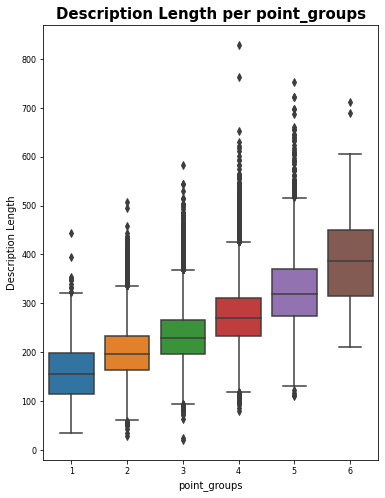

In [30]:
fig, ax = plt.subplots(figsize=(6,8))
sns.boxplot(x='point_groups', y='desc_len', data=df)

plt.xticks(fontsize=8)
ax.set_xlabel('point_groups', fontsize = 10)
plt.yticks(fontsize=8)
ax.set_ylabel('Description Length', fontsize = 10)

ax.set_title('Description Length per point_groups', fontweight="bold", size=15)
plt.show()

Similar behaviour is observed in the point groups

### High level Statistics of Numeric Columns

In [31]:
df.describe()

points         price      desc_len
count  103322.000000  96359.000000  103322.00000
mean       88.540630     36.781224     243.15684
std         3.090903     42.867069      67.85485
min        80.000000      4.000000      20.00000
25%        86.000000     18.000000     197.00000
50%        88.000000     27.000000     238.00000
75%        91.000000     45.000000     284.00000
max       100.000000   3300.000000     829.00000

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103322 entries, 0 to 103321
Data columns (total 14 columns):
user_name             79191 non-null object
country               103283 non-null object
review_title          103322 non-null object
review_description    103322 non-null object
designation           73686 non-null object
points                103322 non-null int64
price                 96359 non-null float64
province              103283 non-null object
region_1              87254 non-null object
region_2              44863 non-null object
winery                103322 non-null object
variety               103322 non-null object
point_groups          103322 non-null category
desc_len              103322 non-null int64
dtypes: category(1), float64(1), int64(2), object(10)
memory usage: 10.3+ MB


### Exploring Wineries

In [16]:
win_vc = df.winery.value_counts()
print(win_vc)

Testarossa               217
Williams Selyem          203
Louis Latour             199
Georges Duboeuf          195
Chateau Ste. Michelle    187
                        ... 
Château la Grâce Dieu      1
Intrinsic                  1
Montirius                  1
Bellisco                   1
Marshall Family Wines      1
Name: winery, Length: 14728, dtype: int64


looks like there are a lot of wineries. We need to narrow down our search a bit.

<AxesSubplot:title={'center':'Top 20 Winaries with highest no of reviews'}, xlabel='No Of Reviews', ylabel='Winary'>

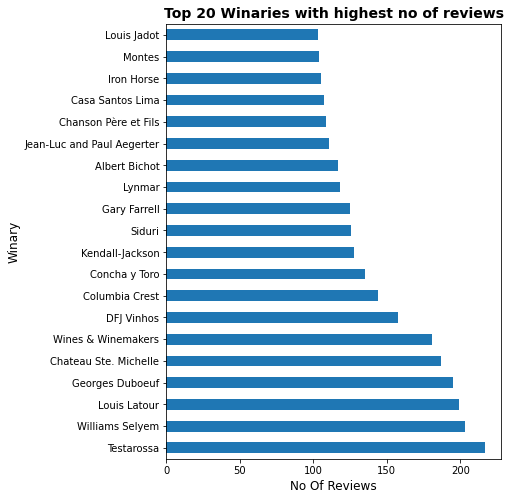

In [37]:
# win_vc[:20].plot(kind='barh',figsize=(6,6))

fig, ax = plt.subplots(figsize=(6,8))

# plt.xticks(fontsize=15)
ax.set_xlabel('No Of Reviews',fontsize=12) 
# plt.yticks(fontsize=15) 
ax.set_ylabel('Winary',fontsize=12) 

ax.set_title('Top 20 Winaries with highest no of reviews', fontweight="bold", size=14) 
win_vc[:20].plot(ax=ax, kind='barh')

Above plot shows top 20 winaries from the dataset based on the no of reviews provided. Testarossa winery has the most no of reviews and this number gradually decreases as we go through the winaries.

<AxesSubplot:title={'center':'Popular wines per their sell in a winary'}, xlabel='No of Wineries that sell this varity', ylabel='Wine Variety'>

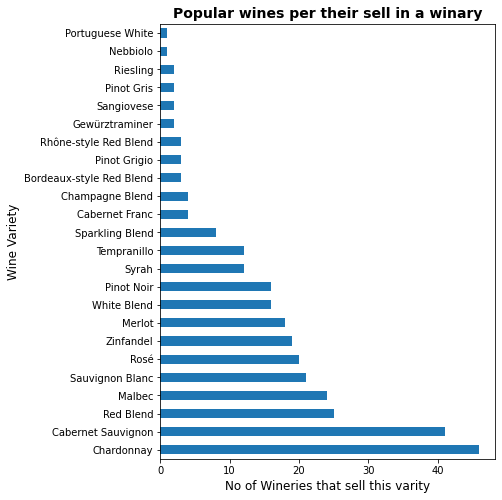

In [34]:
variety_vs_winery = df[['winery','variety']].groupby(['variety']).count().sort_values(['winery'],ascending=False)
# print(variety_vs_winery)
# variety_vs_winery.plot(kind='barh',figsize=(6,8))

fig, ax = plt.subplots(figsize=(6,8))

# plt.xticks(fontsize=15)
ax.set_xlabel('No of Wineries that sell this varity',fontsize=12) 
# plt.yticks(fontsize=15) 
ax.set_ylabel('Wine Variety',fontsize=12) 

ax.set_title('Popular wines per their sell in a winary', fontweight="bold", size=14) 
lowest_rated_varieties.plot(ax=ax, kind='barh')

This graph explains the no of winaries that sell the given wine. It provides us a lot of insights.

1. Pinot Noir is the most rated wine is because most wineries sell this wine.
2. Gewurztraminer is the least rated wine because it is sold by least no of winaries
3. This graph is similar to the one which we got while plotting just the output feature variety. This means that the dataset contains unique combinations of variety and winery.

Proving third point

In [20]:
(df[['winery','variety']].groupby(['variety']).count().sort_values(['winery'])['winery'] ==  df[['winery','variety']].groupby(['variety']).agg(['unique','count']).sort_values([('winery',  'count')])[('winery',  'count')]).all()

True

### Wineries vs ratings

In [23]:
(df[['winery','points']].groupby(['points']).agg(['unique','count']).sort_values([('winery','count')])[('winery','count')] \
    == \
df[['winery','points']].groupby(['points']).count().sort_values(['winery'])['winery']).all()

True

<AxesSubplot:title={'center':'Winery count per rating'}, xlabel='points', ylabel='No Of Winaries'>

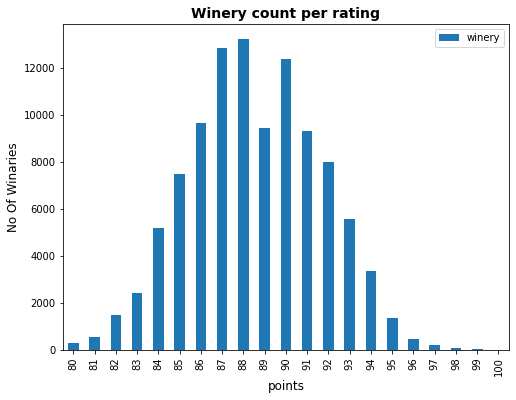

In [39]:
rating_by_winary = df[['winery','points']].groupby(['points']).count()
# .sort_values(['winery'],ascending=False)
# print(rating_by_winary)

fig, ax = plt.subplots(figsize=(8,6))

# plt.xticks(fontsize=15)
ax.set_xlabel('Rating',fontsize=12) 
# plt.yticks(fontsize=15) 
ax.set_ylabel('No Of Winaries',fontsize=12) 

ax.set_title('Winery count per rating', fontweight="bold", size=14) 
rating_by_winary.plot(ax=ax, kind='bar')

This plot is again similar to the varity distribution plot which we plot in the beginning. This means that there is at least one winary that has rated a given value

### <i>We will analyse text data later ...</i>

## Exploring columns with missing values

<AxesSubplot:title={'center':'User Reviews'}, xlabel='Unique Wines', ylabel='Usernames'>

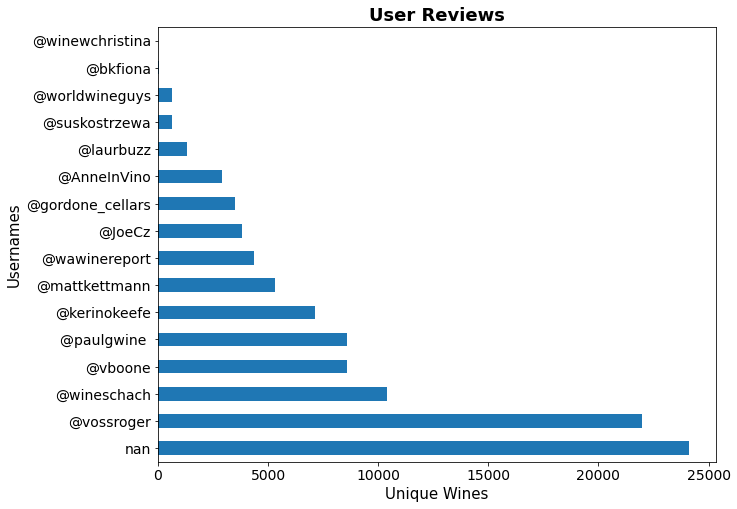

In [66]:
user_counts = df.user_name.value_counts(dropna=False)
# print(user_counts)
# user_counts.plot(kind='barh',figsize=(8,6))

fig, ax = plt.subplots(figsize=(10,8))

plt.xticks(fontsize=14)
ax.set_xlabel('Unique Wines',fontsize=15) 
plt.yticks(fontsize=14) 
ax.set_ylabel('Usernames',fontsize=15) 

ax.set_title('User Reviews', fontweight="bold", size=18) 
user_counts.plot(ax=ax, kind='barh')

@vossroger should take it easy as trying these many wines is not good for their health :P. Even other reviewers, except first two, have given a lot of reviews!

Almost 24k usernames are not present! We need to preprocess this

Let's see what kind of wines are purchsed by existing users

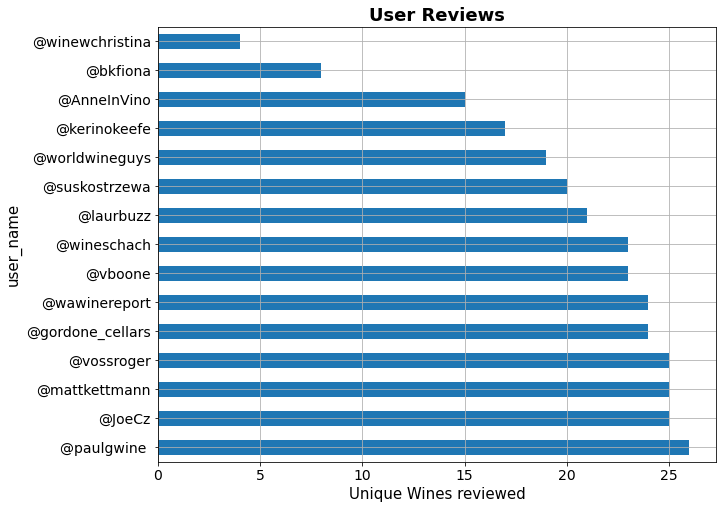

In [69]:
wines_by_users = df[['user_name','variety']].groupby(['user_name']).nunique().sort_values(['variety'],ascending=False)
wines_by_users

fig, ax = plt.subplots(figsize=(10,8))

plt.xticks(fontsize=14)
ax.set_xlabel('Unique Wines reviewed',fontsize=15) 
plt.yticks(fontsize=14) 
ax.set_ylabel('Usernames',fontsize=15) 

ax.set_title('User Reviews', fontweight="bold", size=18) 
wines_by_users['variety'].plot(ax=ax, kind='barh')
plt.grid(True)

It looks like except first two users, almost all of the users have reviewed at least 15 different wines.

No user has tried all 28 types of wines

In [154]:
# df['user_name'].unique().shape
userNames = df['user_name'].dropna().unique()
wine_count_users = df[['user_name','variety']].groupby(['user_name'])['variety'].value_counts()

fill_na_users = {}
fill_na_user_wine_count = {}

for i in userNames:
    
    max_wine = wine_count_users.get(i).argmax()
    max_wine_count = wine_count_users.get(i).max()
    
    if max_wine in fill_na_user_wine_count:
        if fill_na_user_wine_count[max_wine] < max_wine_count:
            fill_na_user_wine_count[max_wine] = max_wine_count
            fill_na_users[max_wine] = i
    else:
        fill_na_user_wine_count[max_wine] = max_wine_count
        fill_na_users[max_wine] = i
            
    print(i.ljust(20), max_wine.ljust(25),max_wine_count)
    
print("\n Usernames to use with missing values")
pp.pprint(fill_na_users)


# This graph is huge and we'll need a very big screen to analyse this graph
# wine_count_users.plot(kind='bar',figsize=(100,20))
# I have printed this information briefly which we need to fill the na values

@kerinokeefe         Red Blend                 2507
@vossroger           Bordeaux-style Red Blend  4710
@paulgwine           Pinot Noir                2721
@vboone              Pinot Noir                1891
@mattkettmann        Pinot Noir                1570
@wineschach          Malbec                    1652
@wawinereport        Cabernet Sauvignon        785
@gordone_cellars     Pinot Noir                560
@JoeCz               Pinot Noir                636
@AnneInVino          Grüner Veltliner          825
@worldwineguys       Red Blend                 151
@laurbuzz            Chardonnay                197
@suskostrzewa        Red Blend                 116
@bkfiona             Sparkling Blend           7
@winewchristina      Chardonnay                1

 Usernames to use with missing values
{   'Bordeaux-style Red Blend': '@vossroger',
    'Cabernet Sauvignon': '@wawinereport',
    'Chardonnay': '@laurbuzz',
    'Grüner Veltliner': '@AnneInVino',
    'Malbec': '@wineschach',
    'P

Okay, it looks like we cannot fill the missing values by grouping it user_names. Because last two users have brought very less amount of the wine and does not represent the missing value for that wine variety well. We will try grouping it by variety and then finding which user has rated that wine variety the most

In [161]:
wine_most_user = df[['user_name','variety']].groupby(['variety'])['user_name'].value_counts()

fill_na_users = {}
# fill_na_user_wine_count = {}

for i in df['variety'].unique():
    
    uname = wine_most_user.get(i).argmax()
    max_review_count = wine_most_user.get(i).max()
    fill_na_users[i] = uname
            
    print(i.ljust(30), uname.ljust(20),max_review_count)
    
print("\n Usernames to use with missing values")
pp.pprint(fill_na_users)


White Blend                    @kerinokeefe         357
Portuguese Red                 @vossroger           2462
Pinot Gris                     @paulgwine           521
Riesling                       @AnneInVino          822
Pinot Noir                     @paulgwine           2721
Gewürztraminer                 @vossroger           245
Cabernet Sauvignon             @vboone              1829
Chardonnay                     @vossroger           2786
Malbec                         @wineschach          1652
Red Blend                      @kerinokeefe         2507
Merlot                         @paulgwine           415
Gamay                          @vossroger           1019
Sauvignon Blanc                @vossroger           985
Bordeaux-style White Blend     @vossroger           1015
Sangiovese                     @kerinokeefe         1584
Cabernet Franc                 @vossroger           172
Champagne Blend                @vossroger           1166
Bordeaux-style Red Blend       @vossro

This will give us a rough estimate of what value should we use to fill the missing usernames in a review of a wine variety

### Let's go through country data and province

In [169]:
print(df['country'].isna().sum())
print(df['province'].isna().sum())

39
39


It looks like there are not that many missing values in the country column. We will extrapolate this value based on the username. Doing preprocessing for just 29 out of over 100,000 records doesn't make any sense. we will just remove these rows.

In [192]:
df = df.dropna(subset=['country','province'])

In [206]:
df['country'].isna().any()

False

In [215]:
df[df['country'] == 'Slovakia']

user_name   country                        review_title  \
18041       NaN  Slovakia  Château Bela 2008 Riesling (Muzla)   

                                      review_description designation  points  \
18041  Delicious scents of honey, apples and petrol l...         NaN      87   

       price province region_1 region_2        winery   variety point_groups  \
18041   16.0    Muzla      NaN      NaN  Château Bela  Riesling            3   

       desc_len  
18041       243

We cannot extrapolate the username based on this country as there is only one row. We'll remove this one too.

In [219]:
df = df[df['country'] != 'Slovakia']

In [221]:
user_ctry = df[['user_name','country']].groupby('country')['user_name'].value_counts()

fill_na_users2 = {}
# fill_na_user_wine_count = {}

for i in df['country'].unique():
    uname = user_ctry.get(i).argmax()
    max_review_count = user_ctry.get(i).max()
    fill_na_users2[i] = uname
            
    print(i.ljust(30), uname.ljust(20),max_review_count)
    
print("\n Usernames to use with missing values")
pp.pprint(fill_na_users2)

Italy                          @kerinokeefe         7150
Portugal                       @vossroger           4028
US                             @vboone              8589
France                         @vossroger           17064
Germany                        @JoeCz               344
Argentina                      @wineschach          3201
Chile                          @wineschach          3515
Australia                      @JoeCz               1108
Austria                        @AnneInVino          1635
South Africa                   @laurbuzz            630
New Zealand                    @JoeCz               1290
Israel                         @worldwineguys       224
Spain                          @wineschach          3390
Romania                        @worldwineguys       55
Greece                         @suskostrzewa        189
Mexico                         @wineschach          50
Hungary                        @worldwineguys       30
Slovenia                       @worldwin

Let's fill missing usernames based on their country as it is likely to provide better distribution of usernames

In [234]:
df.user_name = df.user_name.fillna(df.country.map(fill_na_users2))

In [235]:
df.user_name.isna().any()

False

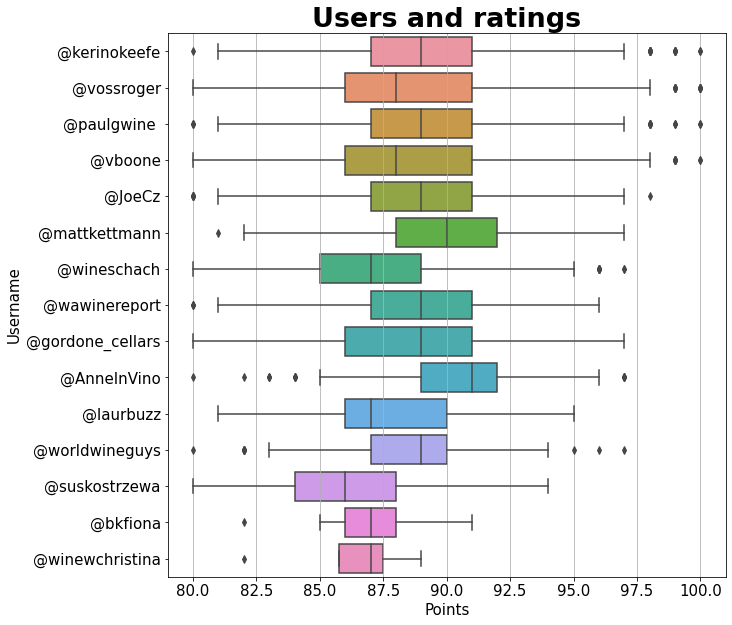

In [411]:
fig, ax = plt.subplots(figsize=(10,10))
sns.boxplot(x='points', y='user_name', data=df)

plt.xticks(fontsize=15)
ax.set_xlabel('Points', fontsize = 15)
plt.yticks(fontsize=15)
ax.set_ylabel('Username', fontsize = 15)


ax.set_title('Users and ratings', fontweight="bold", size=27)
ax.xaxis.grid(True)
plt.show()

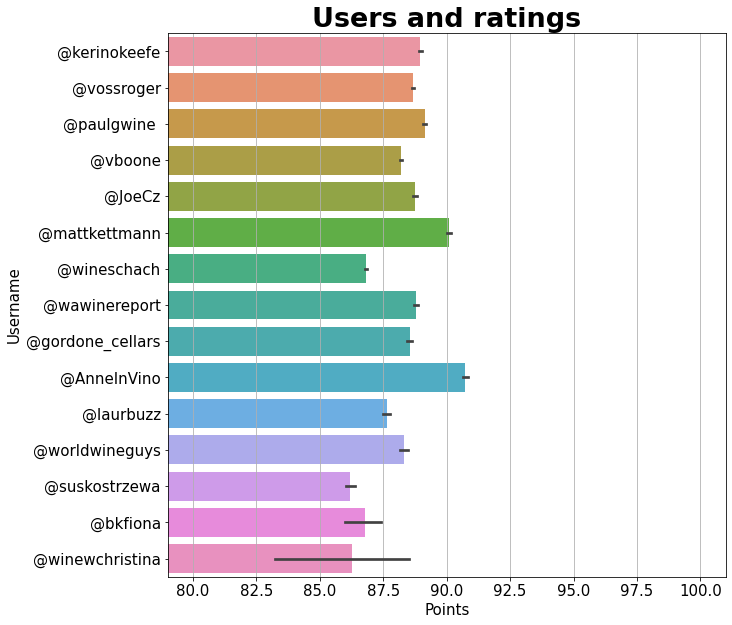

In [410]:
fig, ax = plt.subplots(figsize=(10,10))
sns.barplot(x='points', y='user_name', data=df)

plt.xticks(fontsize=15)
ax.set_xlabel('Points', fontsize = 15)
plt.yticks(fontsize=15)
ax.set_ylabel('Username', fontsize = 15)
ax.set(xlim=(79, 101))


ax.set_title('Users and ratings', fontweight="bold", size=27)
ax.xaxis.grid(True)
plt.show()

It looks like the central tendancy for most of the reviewers is between 87.5 and 90. User '@winewchrisha' has the biggest error bar showing the amount of uncertainty in the prediction of the rating given by this user.

#### Cleaning Designation

In [246]:
print(df['designation'].nunique())
print(df.designation.isna().sum())

30309
29636


Due to the amount of missing values in this columns and unique values in the column, to keep it simple, We'll use most common designation to fill the na values

In [239]:
df.designation = df.designation.fillna(df.designation.mode().iloc[0])

In [240]:
df.designation.isna().any()

False

In [414]:
df.designation.nunique()

30289

#### Cleaning region_1 and region_2

In [247]:
print(df['region_1'].nunique())
print(df.region_1.isna().sum())
print()

1056
16028


In [249]:
df.region_1.value_counts()

Napa Valley                4158
Columbia Valley (WA)       3710
Russian River Valley       2952
California                 2368
Willamette Valley          2201
                           ... 
Vin Pétillant                 1
Soave Colli Scaligeri         1
Cacc’e Mmitte di Lucera       1
Vesuvio                       1
Pompeiano                     1
Name: region_1, Length: 1056, dtype: int64

Due to the amount of missing values in this columns and unique values in the column, to keep it simple, We'll use most common region_1 to fill the na values

In [250]:
df.region_1 = df.region_1.fillna(df.region_1.mode().iloc[0])
df.region_1.isna().any()

False

In [251]:
print(df['region_2'].nunique())
print(df.region_2.isna().sum())
print()

17
58419



In [304]:
df.region_2.value_counts()

Central Coast        67766
Sonoma                8465
Columbia Valley       7098
Napa                  6381
Willamette Valley     3275
California Other      2400
Finger Lakes          1643
Napa-Sonoma           1134
Sierra Foothills       974
Central Valley         784
Southern Oregon        678
Oregon Other           669
Long Island            617
North Coast            514
Washington Other       479
South Coast            210
New York Other         195
Name: region_2, dtype: int64

In [256]:
df.region_2 = df.region_2.fillna(df.region_2.mode().iloc[0])
df.region_2.isna().any()

False

# Region 2 vs points

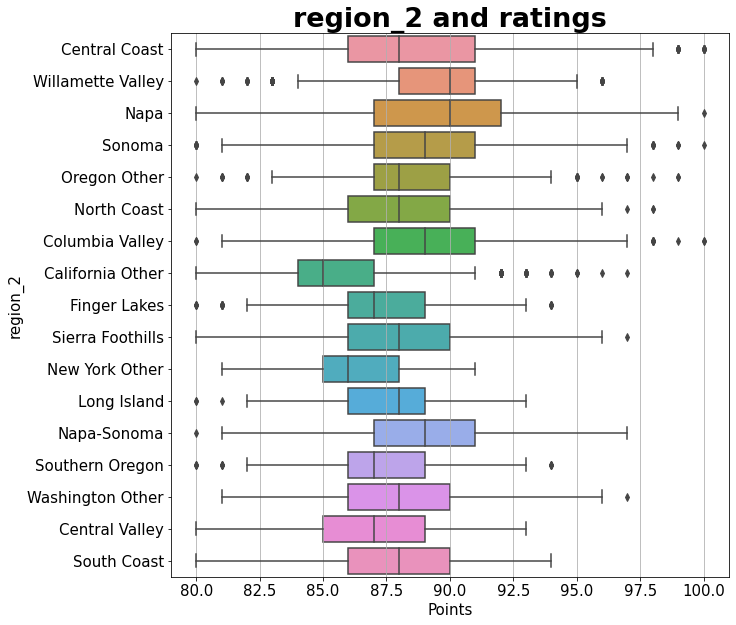

In [422]:
fig, ax = plt.subplots(figsize=(10,10))
sns.boxplot(x='points', y='region_2', data=df)

plt.xticks(fontsize=15)
ax.set_xlabel('Points', fontsize = 15)
plt.yticks(fontsize=15)
ax.set_ylabel('region_2', fontsize = 15)


ax.set_title('region_2 and ratings', fontweight="bold", size=27)
ax.xaxis.grid(True)
plt.show()

The average distribution of the points across various regions ais approximately similar.

<AxesSubplot:title={'center':'wine ratings distribution per region'}, xlabel='Count', ylabel='region_2'>

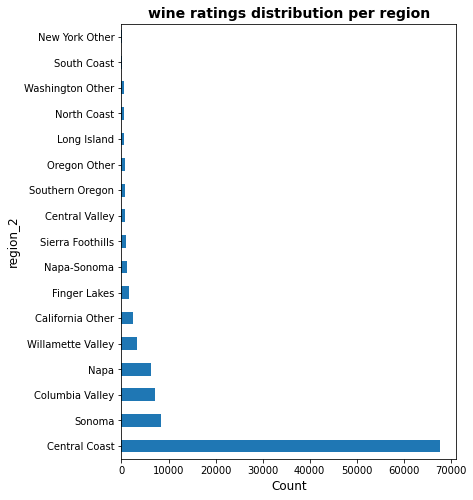

In [424]:
fig, ax = plt.subplots(figsize=(6,8))

# plt.xticks(fontsize=15)
ax.set_xlabel('Count',fontsize=12) 
# plt.yticks(fontsize=15) 
ax.set_ylabel('region_2',fontsize=12) 

ax.set_title('wine ratings distribution per region', fontweight="bold", size=14) 
df.region_2.value_counts().plot(ax=ax, kind='barh')

In [426]:
df.region_2.value_counts()/df.shape[0]

Central Coast        0.656126
Sonoma               0.081960
Columbia Valley      0.068724
Napa                 0.061782
Willamette Valley    0.031709
California Other     0.023237
Finger Lakes         0.015908
Napa-Sonoma          0.010980
Sierra Foothills     0.009430
Central Valley       0.007591
Southern Oregon      0.006565
Oregon Other         0.006477
Long Island          0.005974
North Coast          0.004977
Washington Other     0.004638
South Coast          0.002033
New York Other       0.001888
Name: region_2, dtype: float64

This graph and data shows that almost 65% of the reviews in our data are from central coast region. We'll explore central cost region in detail

<AxesSubplot:title={'center':'wines sold in Central Cost'}, xlabel='Count', ylabel='region_2'>

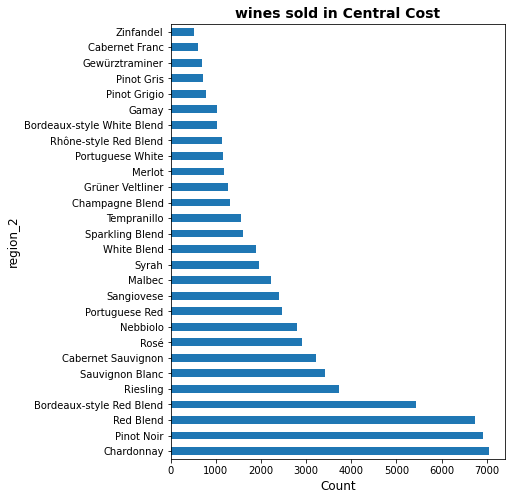

In [428]:
fig, ax = plt.subplots(figsize=(6,8))

# plt.xticks(fontsize=15)
ax.set_xlabel('Count',fontsize=12) 
# plt.yticks(fontsize=15) 
ax.set_ylabel('region_2',fontsize=12) 

ax.set_title('wines sold in Central Cost', fontweight="bold", size=14) 
df[df.region_2 == 'Central Coast'].variety.value_counts().plot(ax=ax, kind='barh')

Chardonnay, Pinot Noir and Red Blend are some of the highest selling wines from the Central Coast region.

This means that this region sells the highest selling wines of all time. This also explains why there are so many reviews of Chardonnay and Pinot Noir.

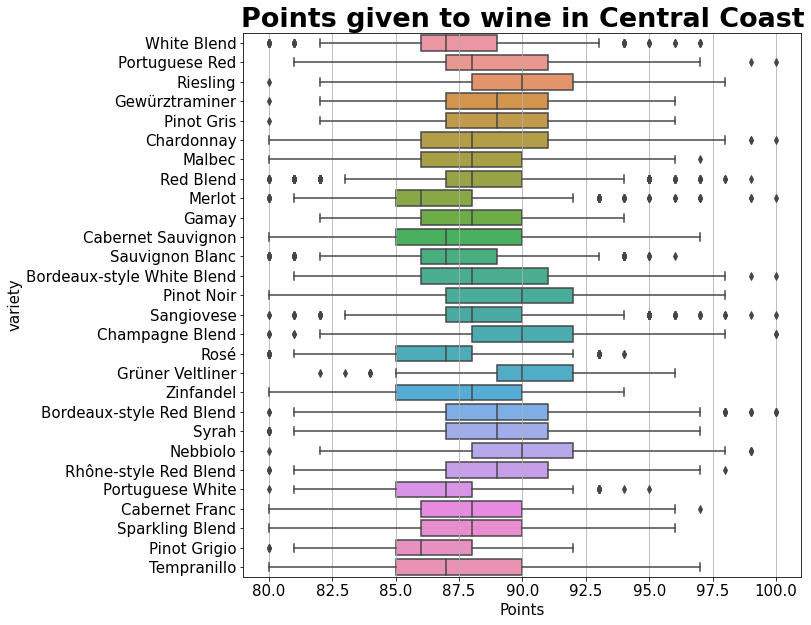

In [429]:
fig, ax = plt.subplots(figsize=(10,10))
sns.boxplot(x='points', y='variety', data=df[df.region_2 == 'Central Coast'])

plt.xticks(fontsize=15)
ax.set_xlabel('Points', fontsize = 15)
plt.yticks(fontsize=15)
ax.set_ylabel('variety', fontsize = 15)


ax.set_title('Points given to wine in Central Coast', fontweight="bold", size=27)
ax.xaxis.grid(True)
plt.show()

Chardonnay (88) Red Blend (88) being the highest reviewed wines of all time have a lower median score in our dataset. Compared to these two Pinot Noir (90) has a higher median and shows better distribution of points

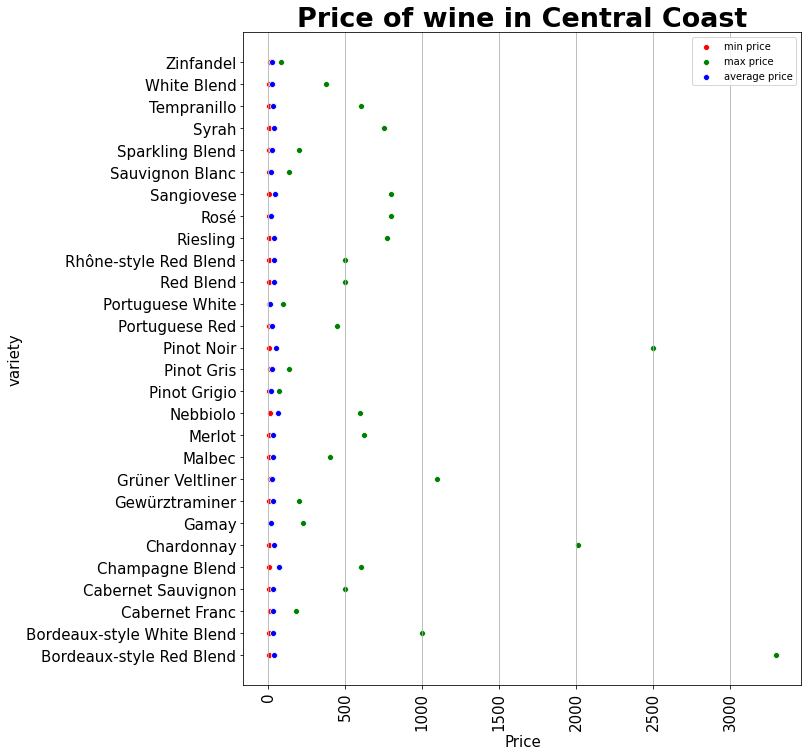

In [472]:
central_coast_min = df[df.region_2 == 'Central Coast'][['variety','price']].groupby(['variety']).min().reset_index()
central_coast_max = df[df.region_2 == 'Central Coast'][['variety','price']].groupby(['variety']).max().reset_index()
central_coast_avg = df[df.region_2 == 'Central Coast'][['variety','price']].groupby(['variety']).mean().reset_index()
# central_coast_min.reset_index()

fig, ax = plt.subplots(figsize=(10,12))
sns.scatterplot(x='price', y='variety', data=central_coast_min,color='red',label="min price")
sns.scatterplot(x='price', y='variety', data=central_coast_max,color='green',label="max price")
sns.scatterplot(x='price', y='variety', data=central_coast_avg,color='blue',label="average price")

plt.xticks(fontsize=15,rotation=90)
ax.set_xlabel('Price', fontsize = 15)
plt.yticks(fontsize=15)
ax.set_ylabel('variety', fontsize = 15)

plt.legend(loc="upper right")

ax.set_title('Price of wine in Central Coast', fontweight="bold", size=27)
ax.xaxis.grid(True)
plt.show()

In [473]:
df[df.region_2 == 'Central Coast'][['variety','price']].groupby(['variety']).agg(['min','max','mean']).reset_index()

variety price                   
                                 min     max       mean
0     Bordeaux-style Red Blend   7.0  3300.0  38.635712
1   Bordeaux-style White Blend   6.0  1000.0  28.518482
2               Cabernet Franc  10.0   180.0  33.186978
3           Cabernet Sauvignon   4.0   500.0  28.475746
4              Champagne Blend   7.0   600.0  70.568182
5                   Chardonnay   5.0  2013.0  36.191104
6                        Gamay   9.0   224.0  20.528893
7               Gewürztraminer   6.0   197.0  29.184397
8             Grüner Veltliner   9.0  1100.0  27.277251
9                       Malbec   5.0   400.0  28.655250
10                      Merlot   5.0   625.0  29.771647
11                    Nebbiolo  12.0   595.0  64.191176
12                Pinot Grigio   4.0    70.0  17.122265
13                  Pinot Gris   9.0   135.0  27.501374
14                  Pinot Noir   5.0  2500.0  49.983398
15              Portuguese Red   5.0   450.0  23.963098
16            Portuguese White   5.0    95.0  14.920190
17                   Red Blend   5.0   500.0  36.309393
18       Rhône-style Red Blend   7.0   500.0  34.452715
19                    Riesling   5.0   775.0  36.394355
20                        Rosé   5.0   800.0  17.919986
21                  Sangiovese   6.0   800.0  45.682612
22             Sauvignon Blanc   5.0   135.0  19.757239
23             Sparkling Blend   7.0   200.0  26.918023
24                       Syrah   4.0   750.0  38.952720
25                 Tempranillo   4.0   600.0  30.731660
26                 White Blend   4.0   375.0  23.221225
27                   Zinfandel   9.0    85.0  27.644359

This means that the price of wine is not same for the Central Coast region. They have sold Bordeaux-style Red Blend as costly as more than \$3300 and as low as 7.

### Let's explore price in a bit detail

In [261]:
df.price.isna().sum()

6959

In [264]:
print(df.price.min())
print(df.price.max())

4.0
3300.0


This means that the wine is as cheap as 4 (say Dollars) and as costly as 3300 Dollars.

In [267]:
df.price.describe()

count    96323.000000
mean        36.785461
std         42.874081
min          4.000000
25%         18.000000
50%         27.000000
75%         45.000000
max       3300.000000
Name: price, dtype: float64

prices have a mean of 36 and median of 27. Standard deviation of price is also huge. This means that we need to shrink down the range so that we get detailed information in the boxplot

In [271]:
df[['price','variety']].groupby(['variety']).agg(['min','max','mean','median','count'])

price                                 
                             min     max       mean median  count
variety                                                          
Bordeaux-style Red Blend     7.0  3300.0  47.210861   30.0   5340
Bordeaux-style White Blend   6.0  1000.0  34.720863   17.0    695
Cabernet Franc              10.0   180.0  34.835890   29.0   1304
Cabernet Sauvignon           4.0   625.0  47.944267   37.0   9384
Champagne Blend              7.0   600.0  70.744839   55.0   1211
Chardonnay                   4.0  2013.0  34.523788   26.0  11077
Gamay                        9.0   224.0  20.699761   20.0    836
Gewürztraminer               6.0   197.0  26.294241   22.0    955
Grüner Veltliner             9.0  1100.0  27.780786   22.0   1145
Malbec                       5.0   400.0  29.926726   22.0   2593
Merlot                       4.0   625.0  29.542633   24.0   3061
Nebbiolo                    12.0   595.0  65.609610   56.0   2331
Pinot Grigio                 4.0    70.0  16.541916   15.0   1002
Pinot Gris                   9.0   135.0  23.078530   19.0   1388
Pinot Noir                   5.0  2500.0  47.532734   42.0  12785
Portuguese Red               5.0   450.0  24.819217   17.0   2196
Portuguese White             5.0    95.0  15.344828   12.5    986
Red Blend                    5.0   500.0  35.890739   28.0   8466
Rhône-style Red Blend        7.0   500.0  34.914530   30.0   1404
Riesling                     5.0   775.0  32.008853   22.0   4970
Rosé                         5.0   800.0  18.506900   16.0   3261
Sangiovese                   6.0   800.0  45.279344   32.0   2377
Sauvignon Blanc              5.0   135.0  20.225523   18.0   4780
Sparkling Blend              5.0   250.0  29.611248   24.0   2027
Syrah                        4.0   750.0  39.137788   35.0   4086
Tempranillo                  4.0   600.0  31.156040   22.0   1788
White Blend                  4.0   375.0  23.239502   19.0   2167
Zinfandel                    5.0   100.0  29.492245   28.0   2708

No prices have median or mode greater than 150. No of prices availble is also big hence we can say that mode and median provide good approximation of the price.

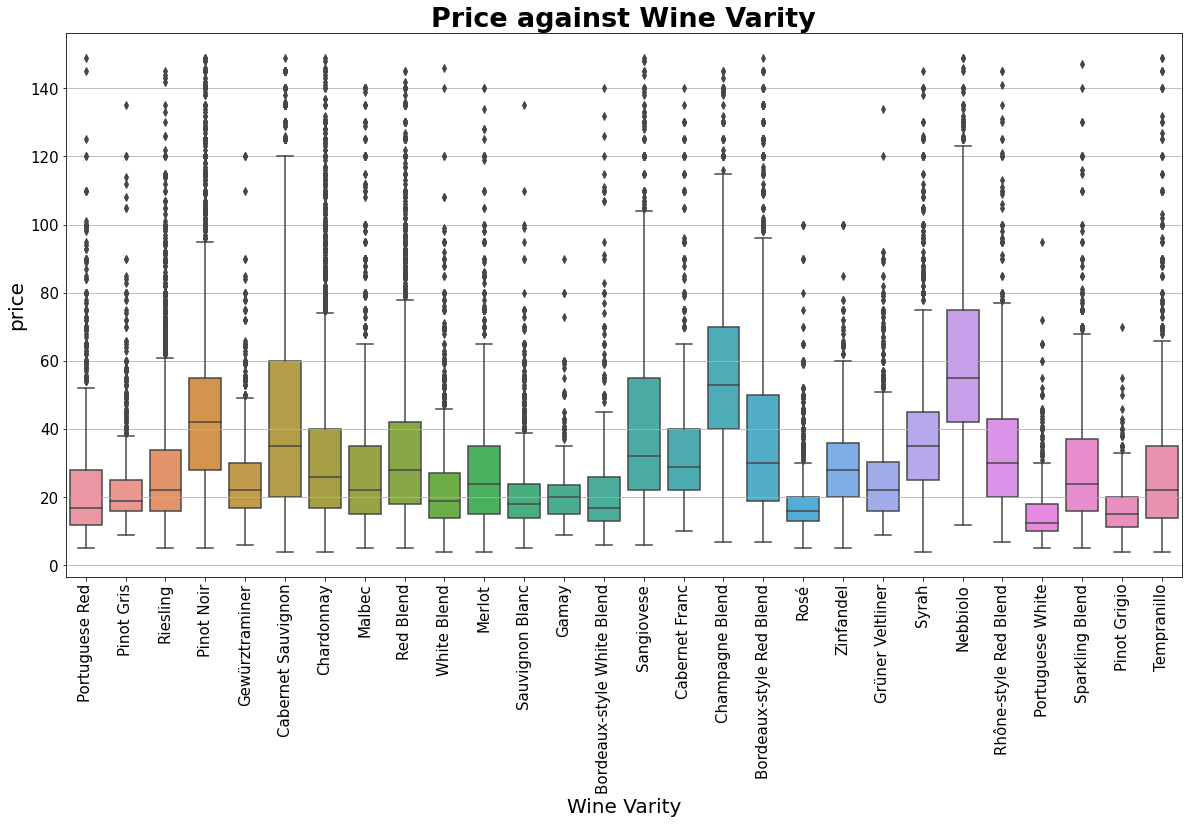

In [274]:
afig, ax = plt.subplots(figsize=(20,10))
sns.boxplot(x='variety', y='price', data=df[df.price < 150])
# sns.swarmplot(x="variety", y="points", data=df,
#               size=2, color=".3", linewidth=0)

plt.xticks(fontsize=15,rotation=90)
ax.set_xlabel('Wine Varity', fontsize = 20)
plt.yticks(fontsize=15)
ax.set_ylabel('price', fontsize = 20)


ax.set_title('Price against Wine Varity', fontweight="bold", size=27)
ax.yaxis.grid(True)
# sns.despine(trim=True, left=True)
plt.show()

Prices have huge no of outliers. However, missing ones can be imputed using the mode or median as we have enough price samples for each variety of wine. 

Let's perform one more analysis where we see how prices behave with different countries

In [279]:
df[df.price > 500][['price','country']].groupby(['country']).agg(['min','max','mean','median','count'])

price                                   
            min     max         mean  median count
country                                           
Austria  1100.0  1100.0  1100.000000  1100.0     1
France    510.0  3300.0   926.888889   685.0    54
Germany   510.0   775.0   699.142857   775.0     7
Italy     540.0   800.0   601.428571   550.0     7
Spain     600.0   600.0   600.000000   600.0     1
US        625.0  2013.0   927.600000   625.0     5

If we assume that any wine above $500 is costly then we can easily see that France sells some of the most costly wines, followed by Germany and Italy.

We'll impute the missing prices based on the median value of corresponding variety

In [284]:
df.price = df[['variety','price']].groupby('variety').transform(lambda x: x.fillna(x.median()))

In [285]:
df.price.isna().any()

False

In [286]:
df.isna().any()

user_name             False
country               False
review_title          False
review_description    False
designation           False
points                False
price                 False
province              False
region_1              False
region_2              False
winery                False
variety               False
point_groups          False
desc_len              False
dtype: bool

# <i>We have finally handled all NA values!</i>

# Handeling Text data

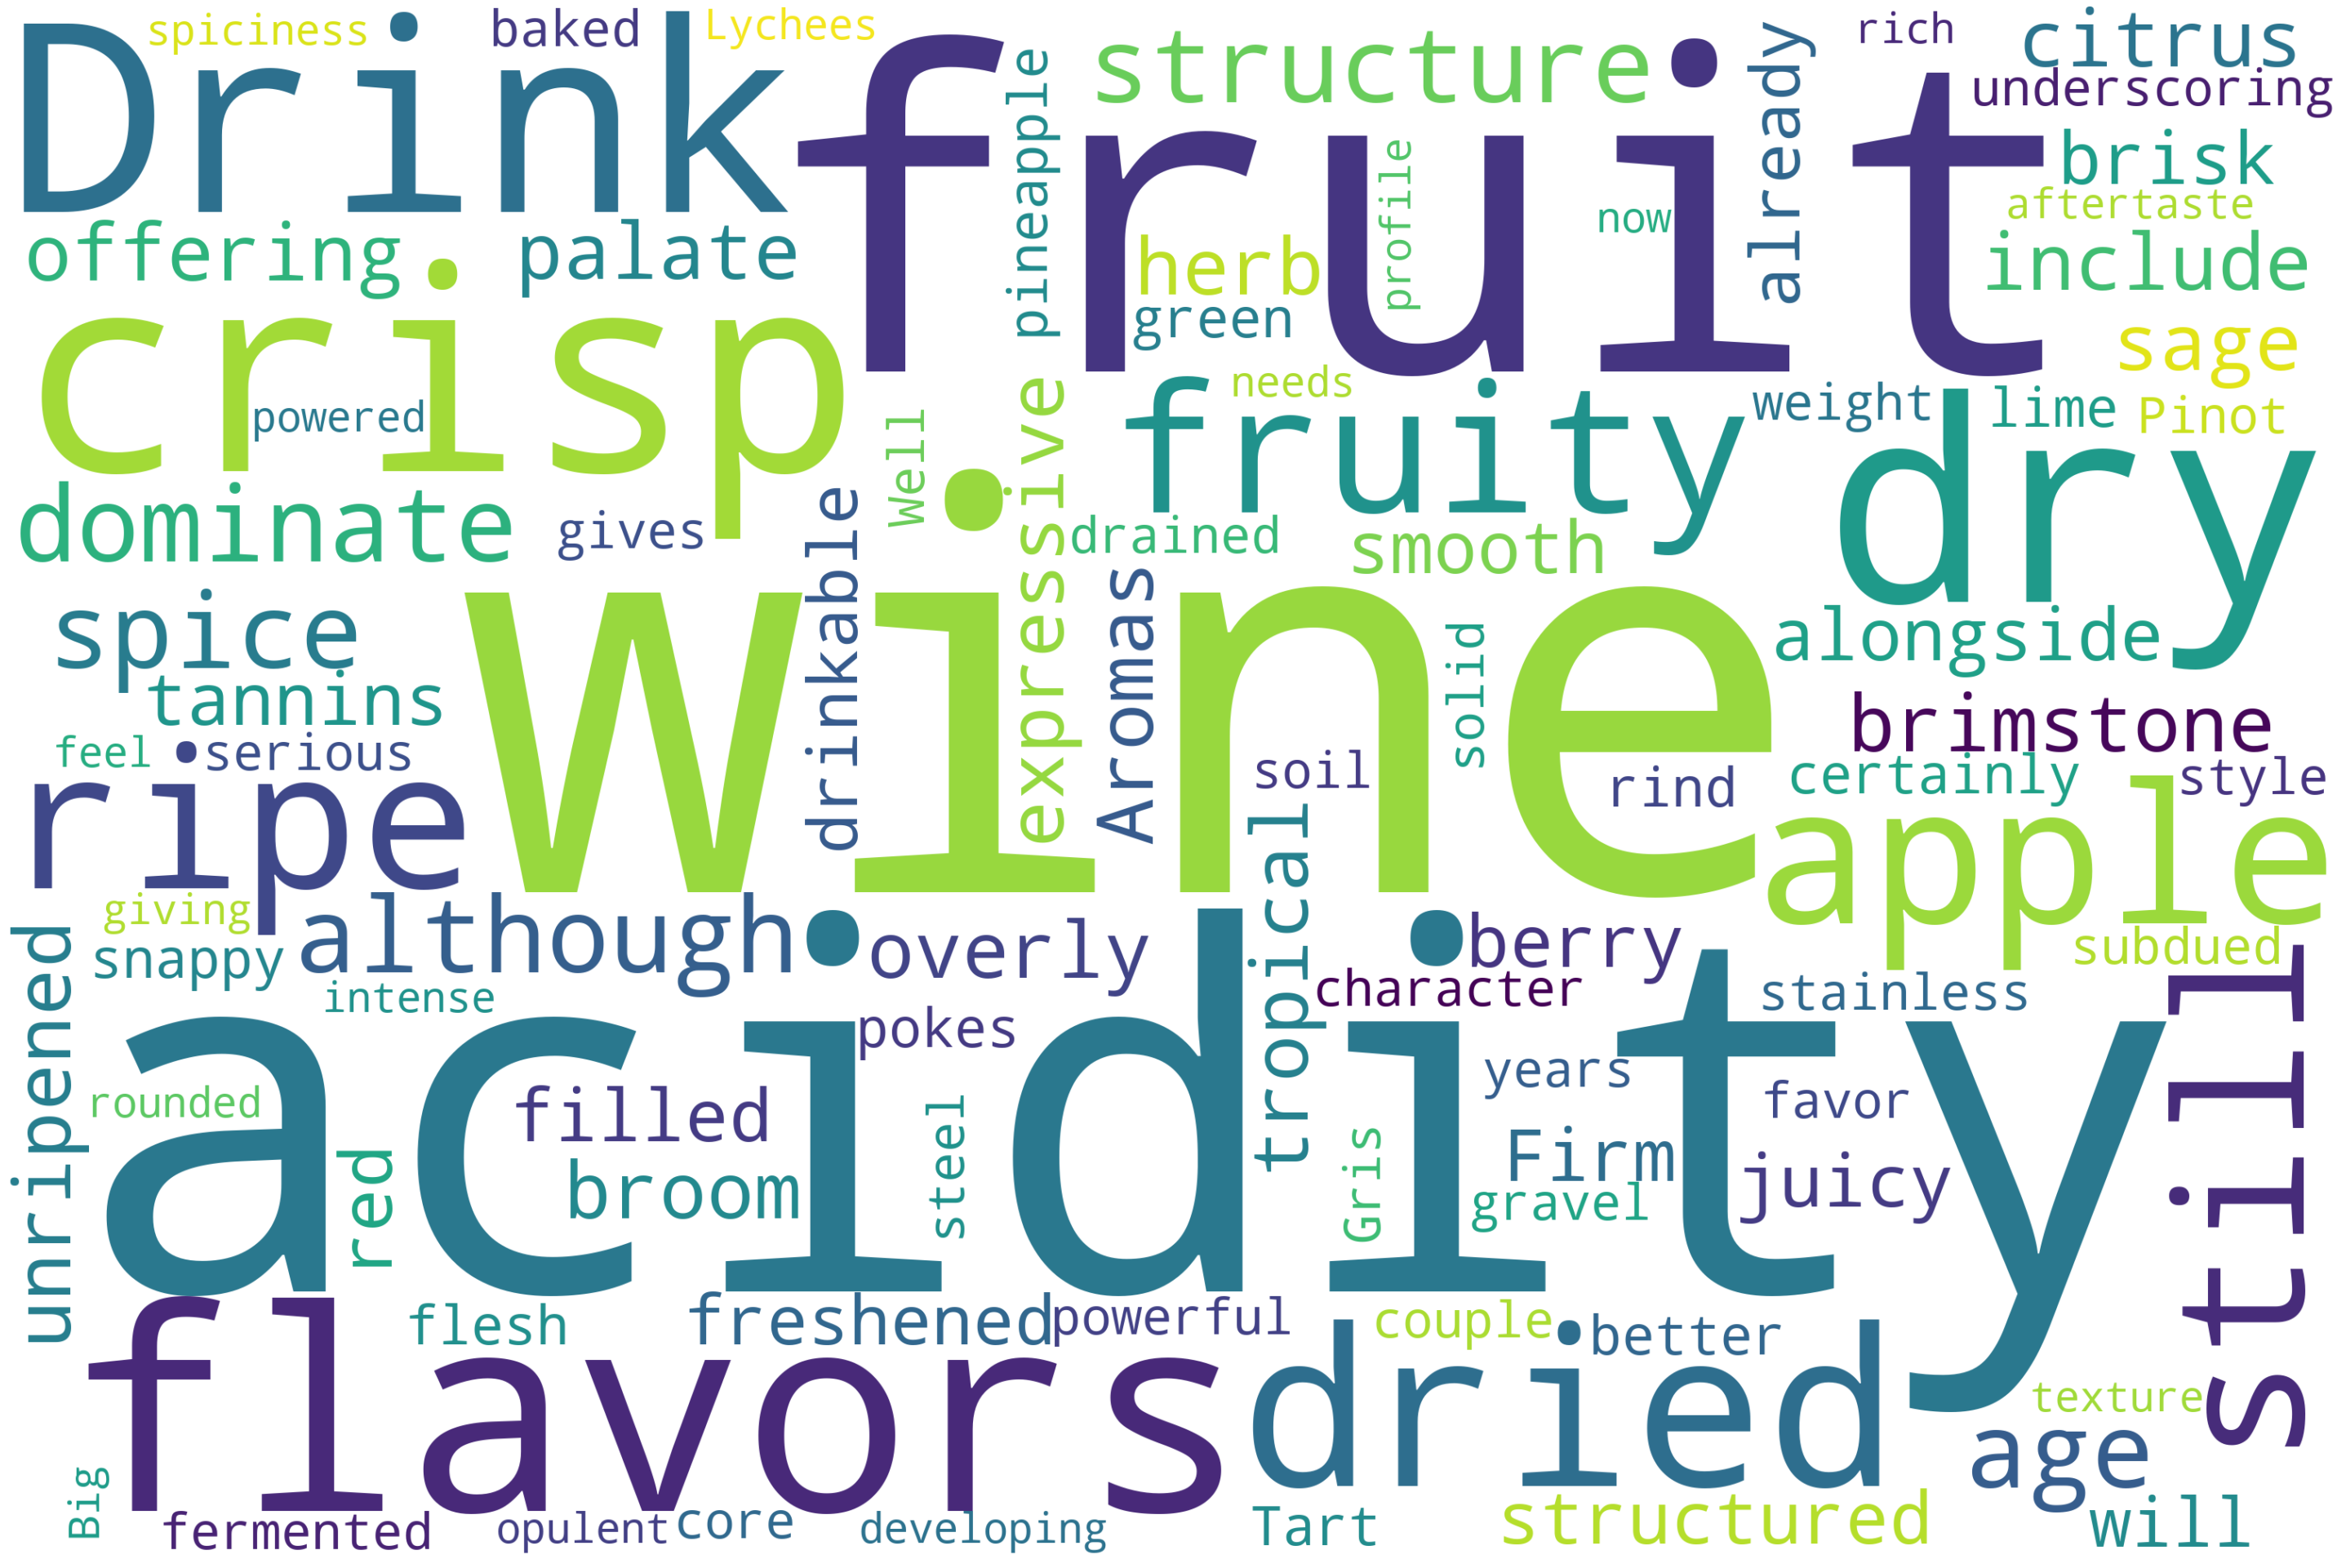

In [49]:
from wordcloud import WordCloud, STOPWORDS
text = df.review_description.values
wordcloud = WordCloud(
    width = 3000,
    height = 2000,
    background_color = 'white',
    stopwords = STOPWORDS).generate(str(text))
fig = plt.figure(
    figsize = (40, 30))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=1)
plt.show()

This word cloud shows the most used words in the reviews. This showes that mostly used words include wine, acidity, fruit, flavors, drink, crisp and dried. 

Since the reviews are contextually similar with very specific lingo, I think giving importance to word-sense disambiguation will not help much.

As you can see the points for a wine is between 80 to 100. Hence the reviews are mostly positive. Hence, I think one-to-one classifer might not be able to learn these subtle differences between classes

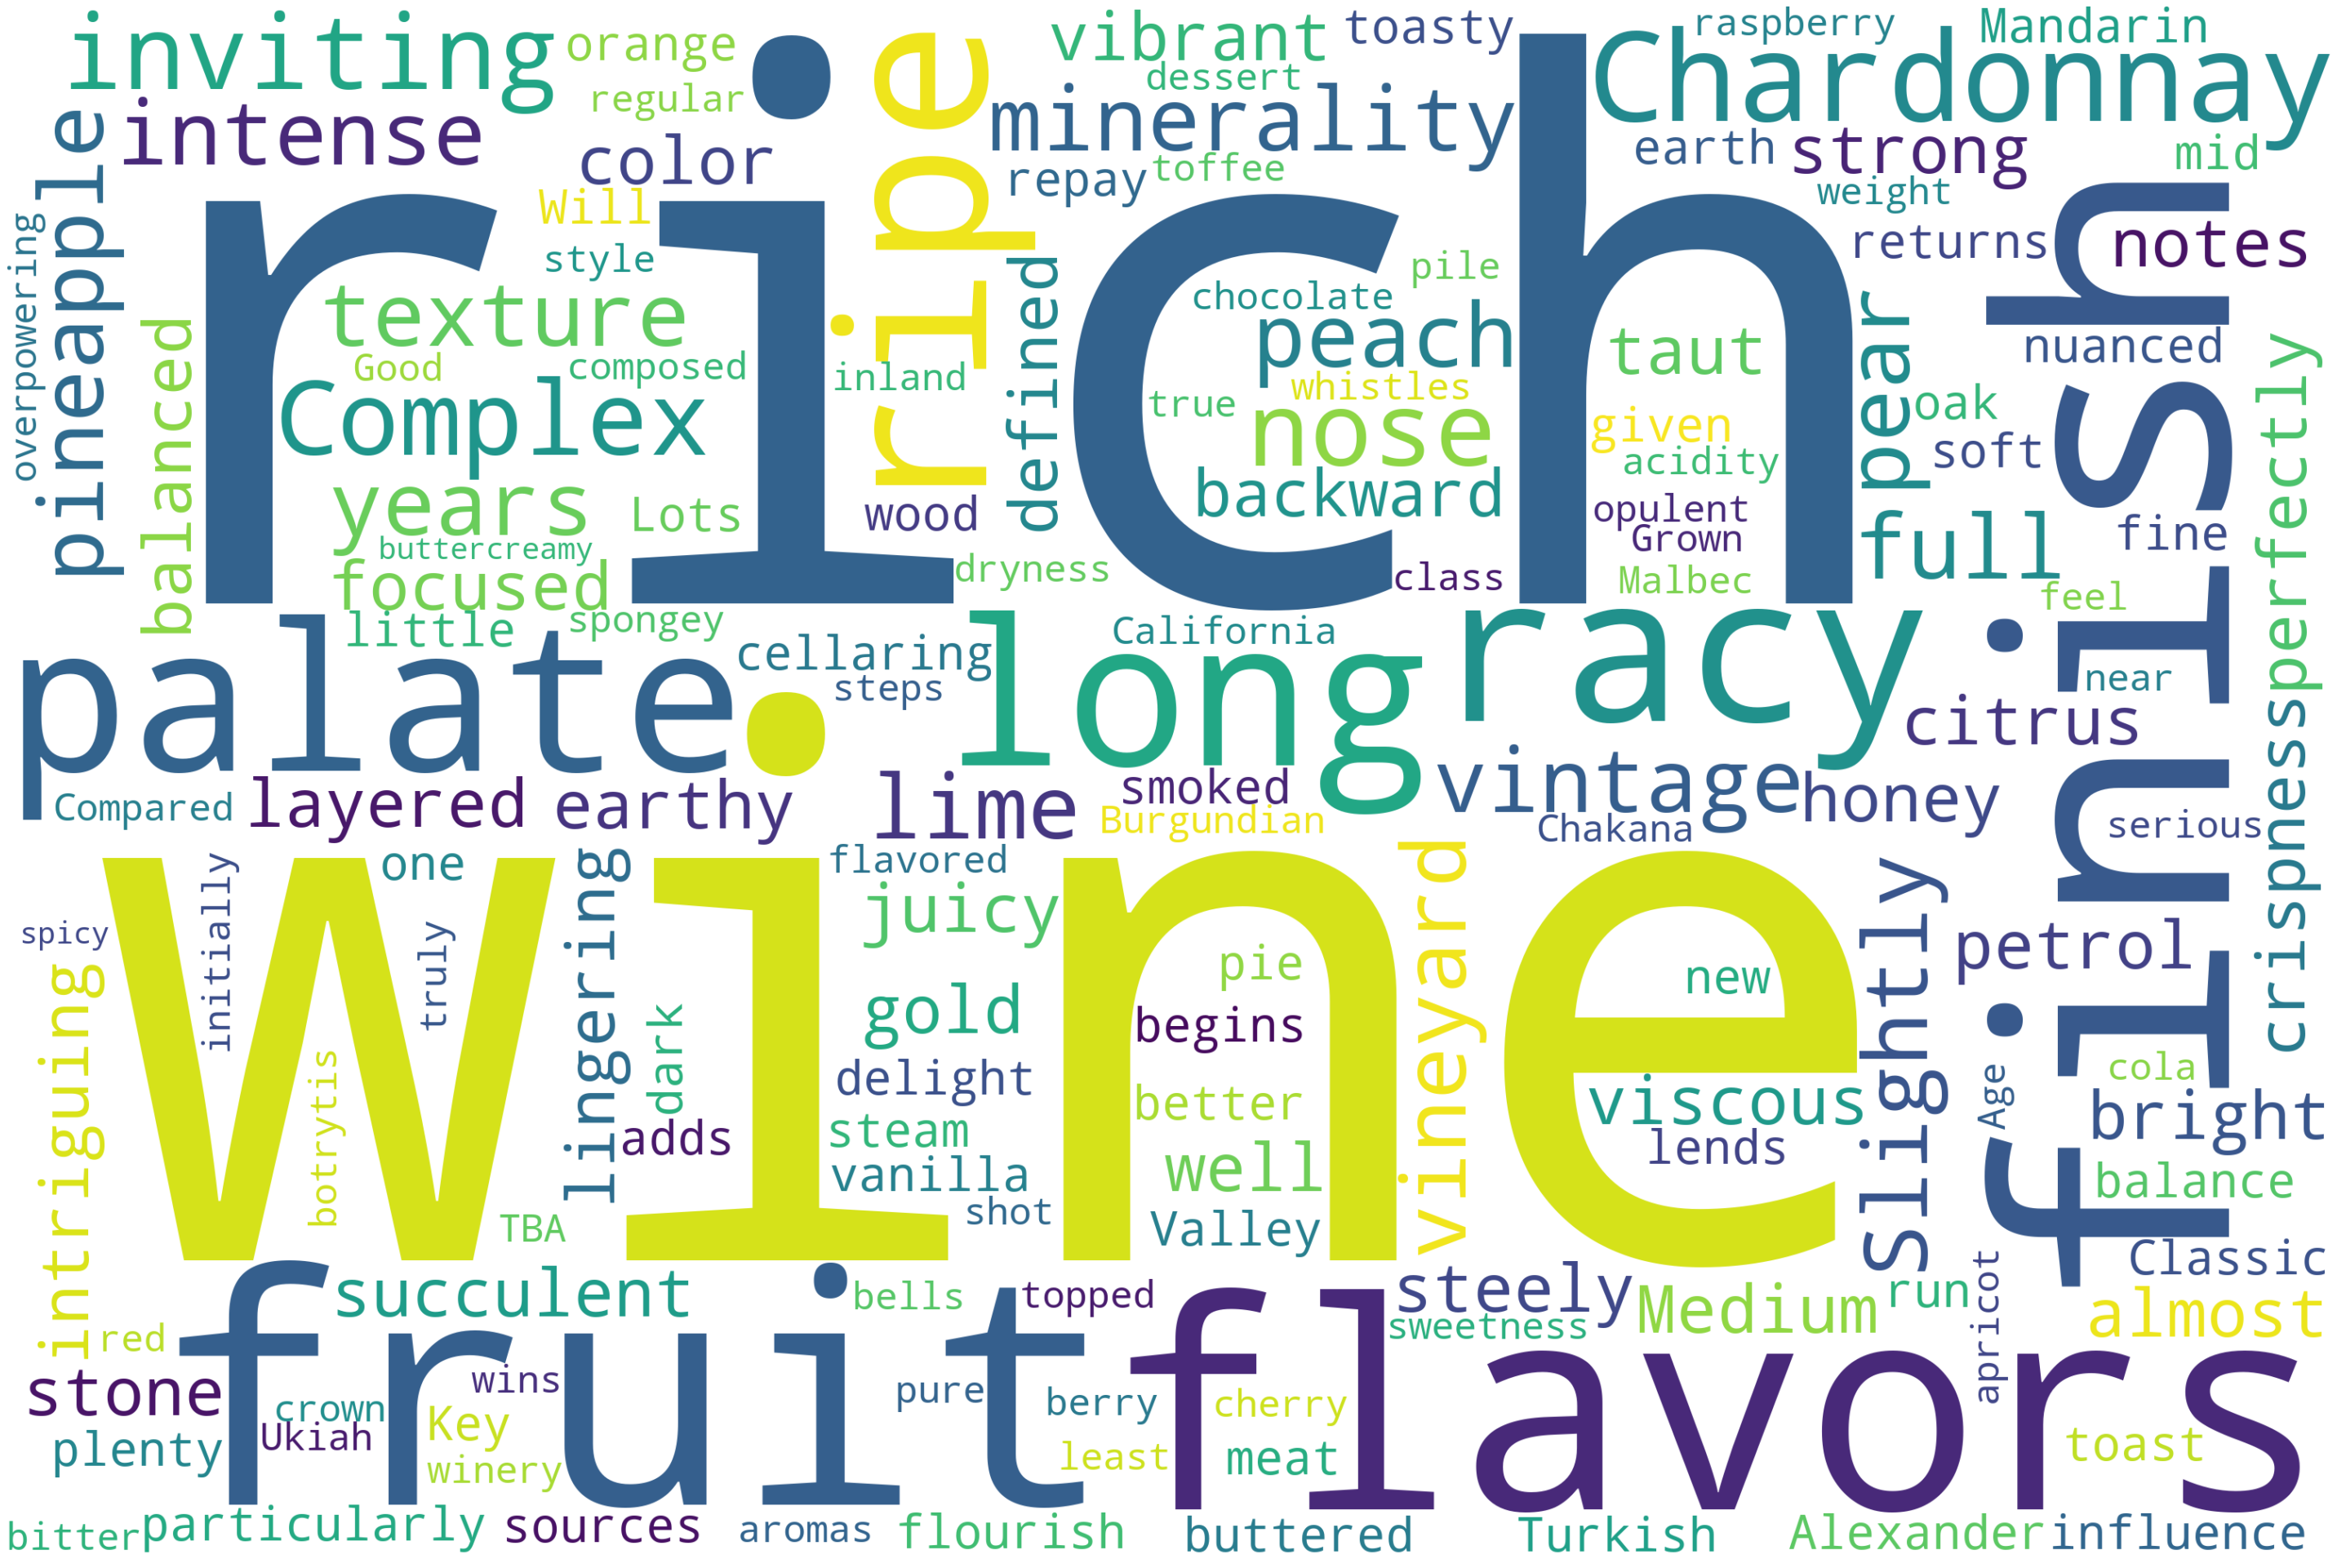

In [421]:
from wordcloud import WordCloud, STOPWORDS
text = df[df.points > 90]['review_description'].values
wordcloud = WordCloud(
    width = 3000,
    height = 2000,
    background_color = 'white',
    stopwords = STOPWORDS).generate(str(text))
fig = plt.figure(
    figsize = (40, 30))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=1)
plt.show()

Most of the good rated wines have these words in their description. They consist of finish, minerality, palate, long, racy which describes the positive sentiment in these reviews. You can also observe some low frequency words like lime, jucy, delight, aromas, full, soft that shows how users have positively described these wines

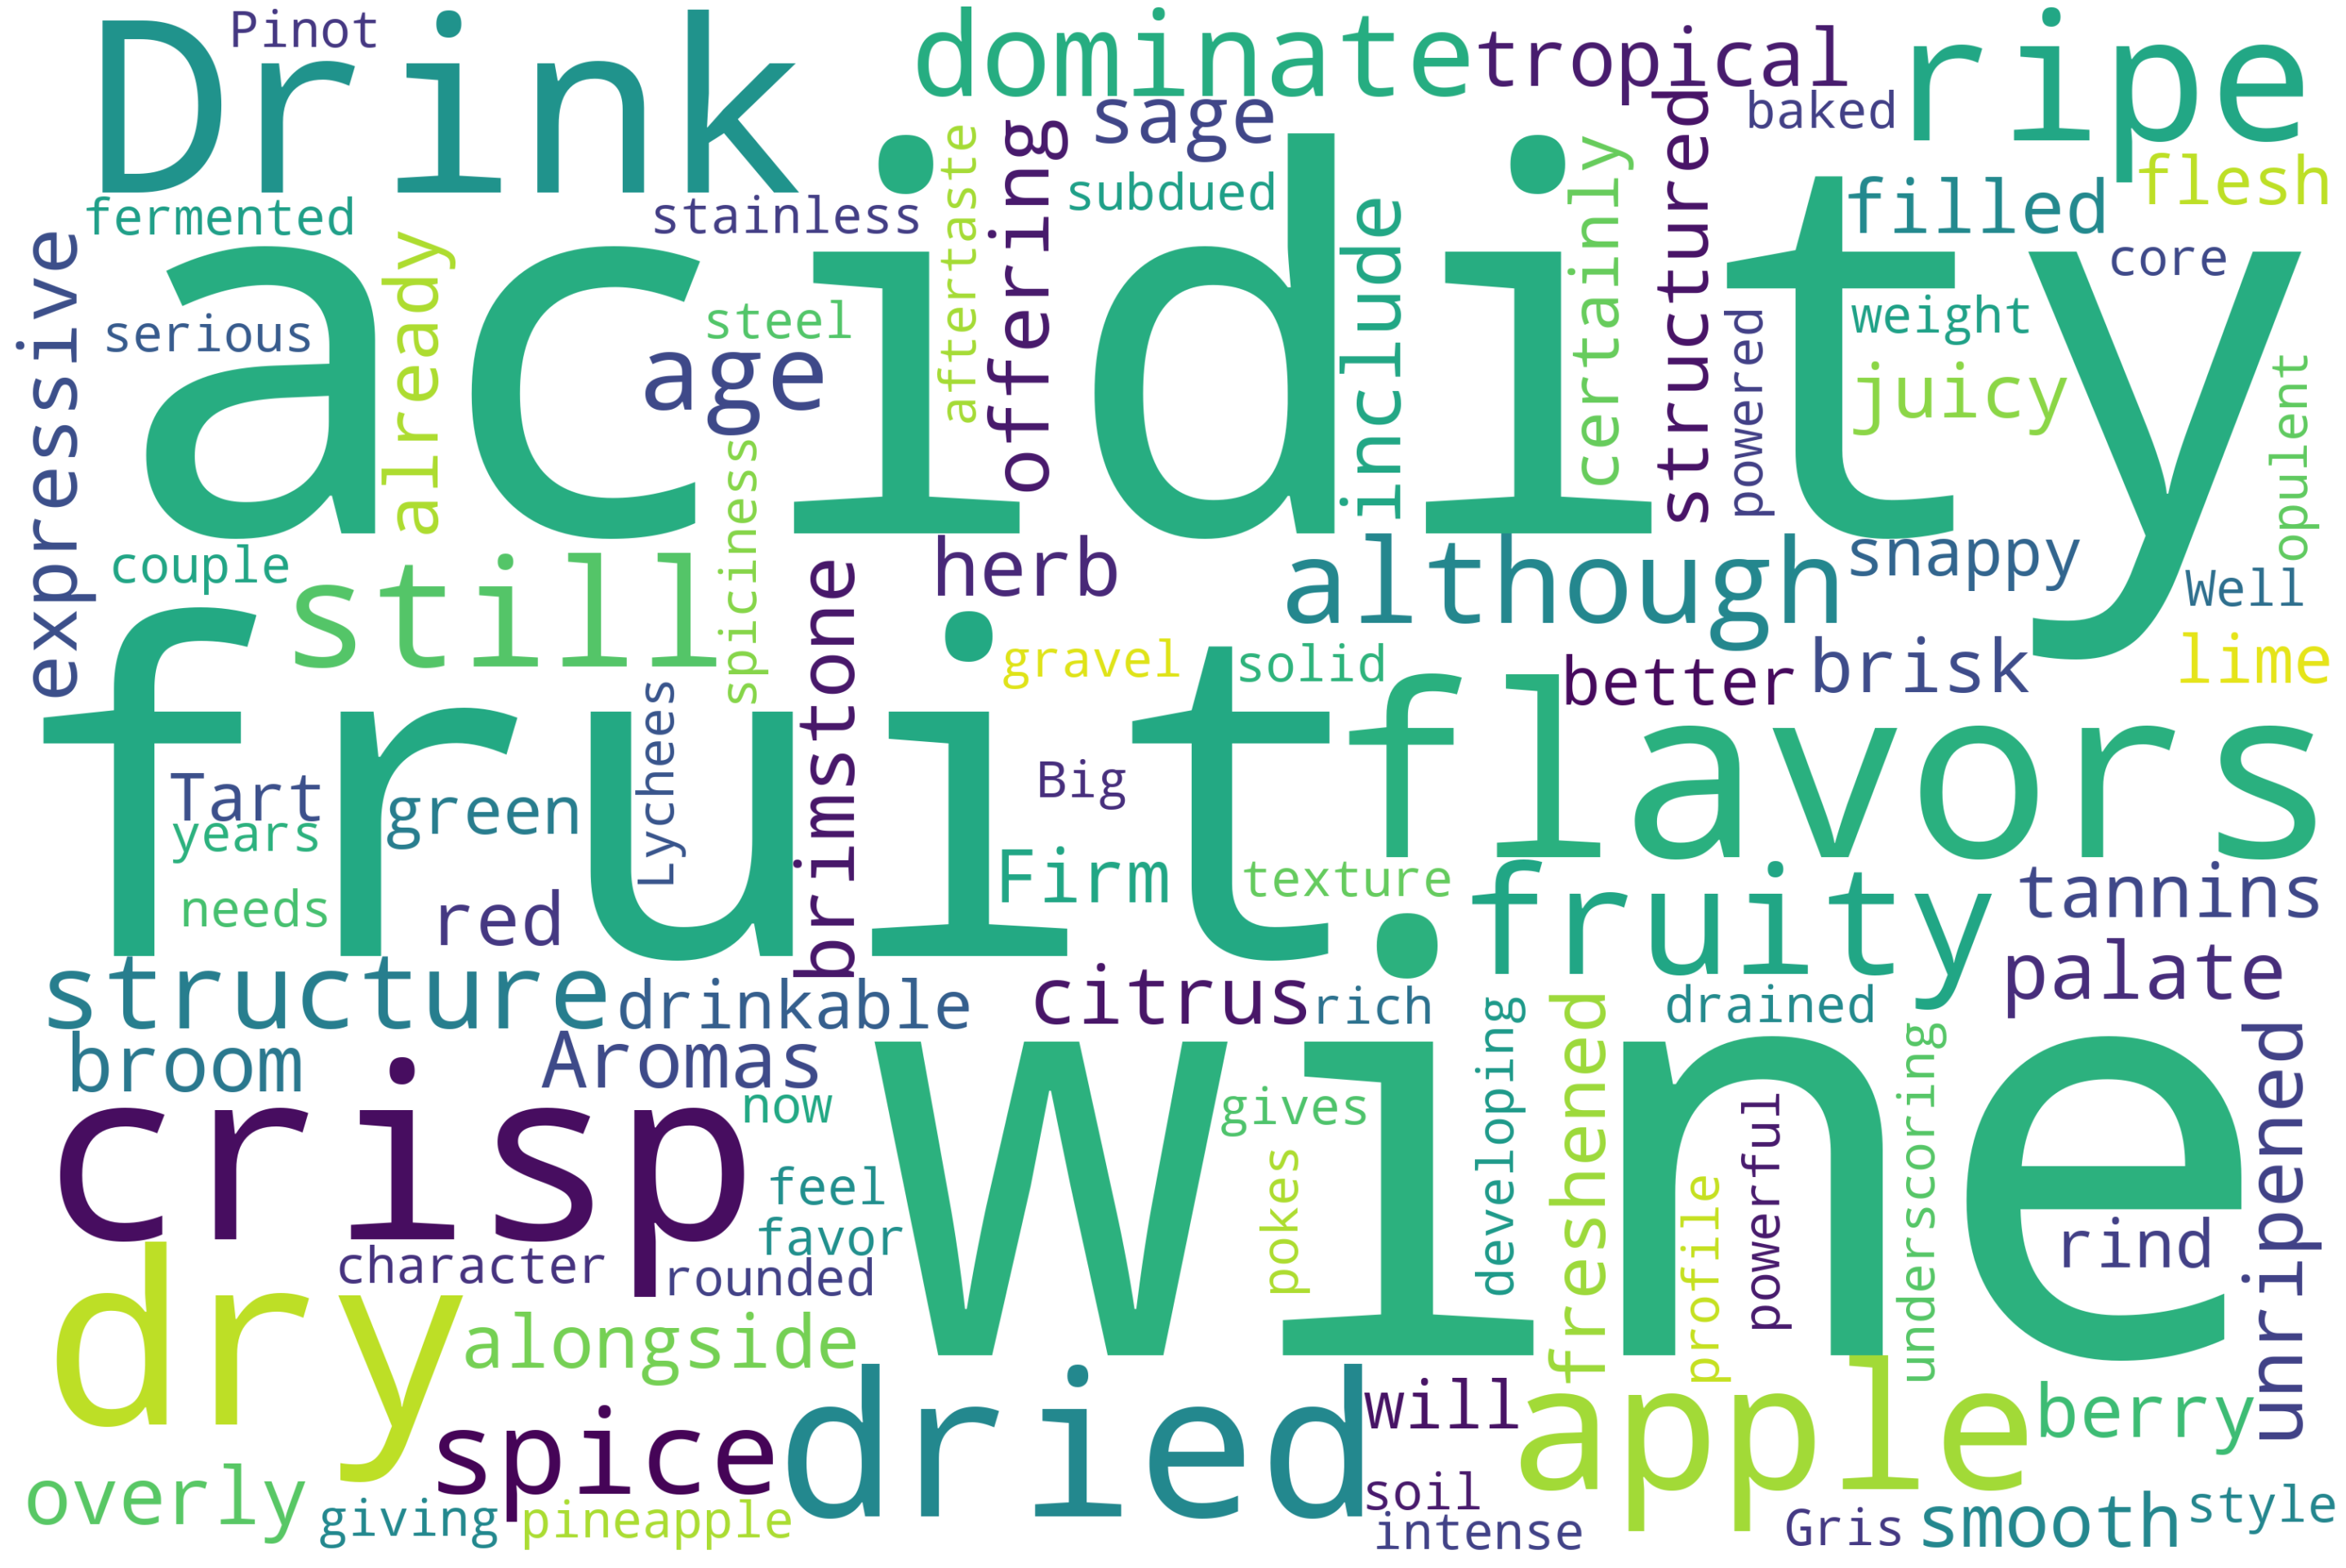

In [420]:
from wordcloud import WordCloud, STOPWORDS
text = df[df.points <= 90]['review_description'].values
wordcloud = WordCloud(
    width = 3000,
    height = 2000,
    background_color = 'white',
    stopwords = STOPWORDS).generate(str(text))
fig = plt.figure(
    figsize = (40, 30))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=1)
plt.show()

low rated wines talk more about acidity and flavours. However, due to a bit of negative sentiment it has words like although still, dry, overly, ripe, dominate etc. Hence, we can see that reviewers have pointed out the positive aspect by using words flavors, expressive, drink but they also explain the where the wine is lacking by using negative sentiment words like although and still.

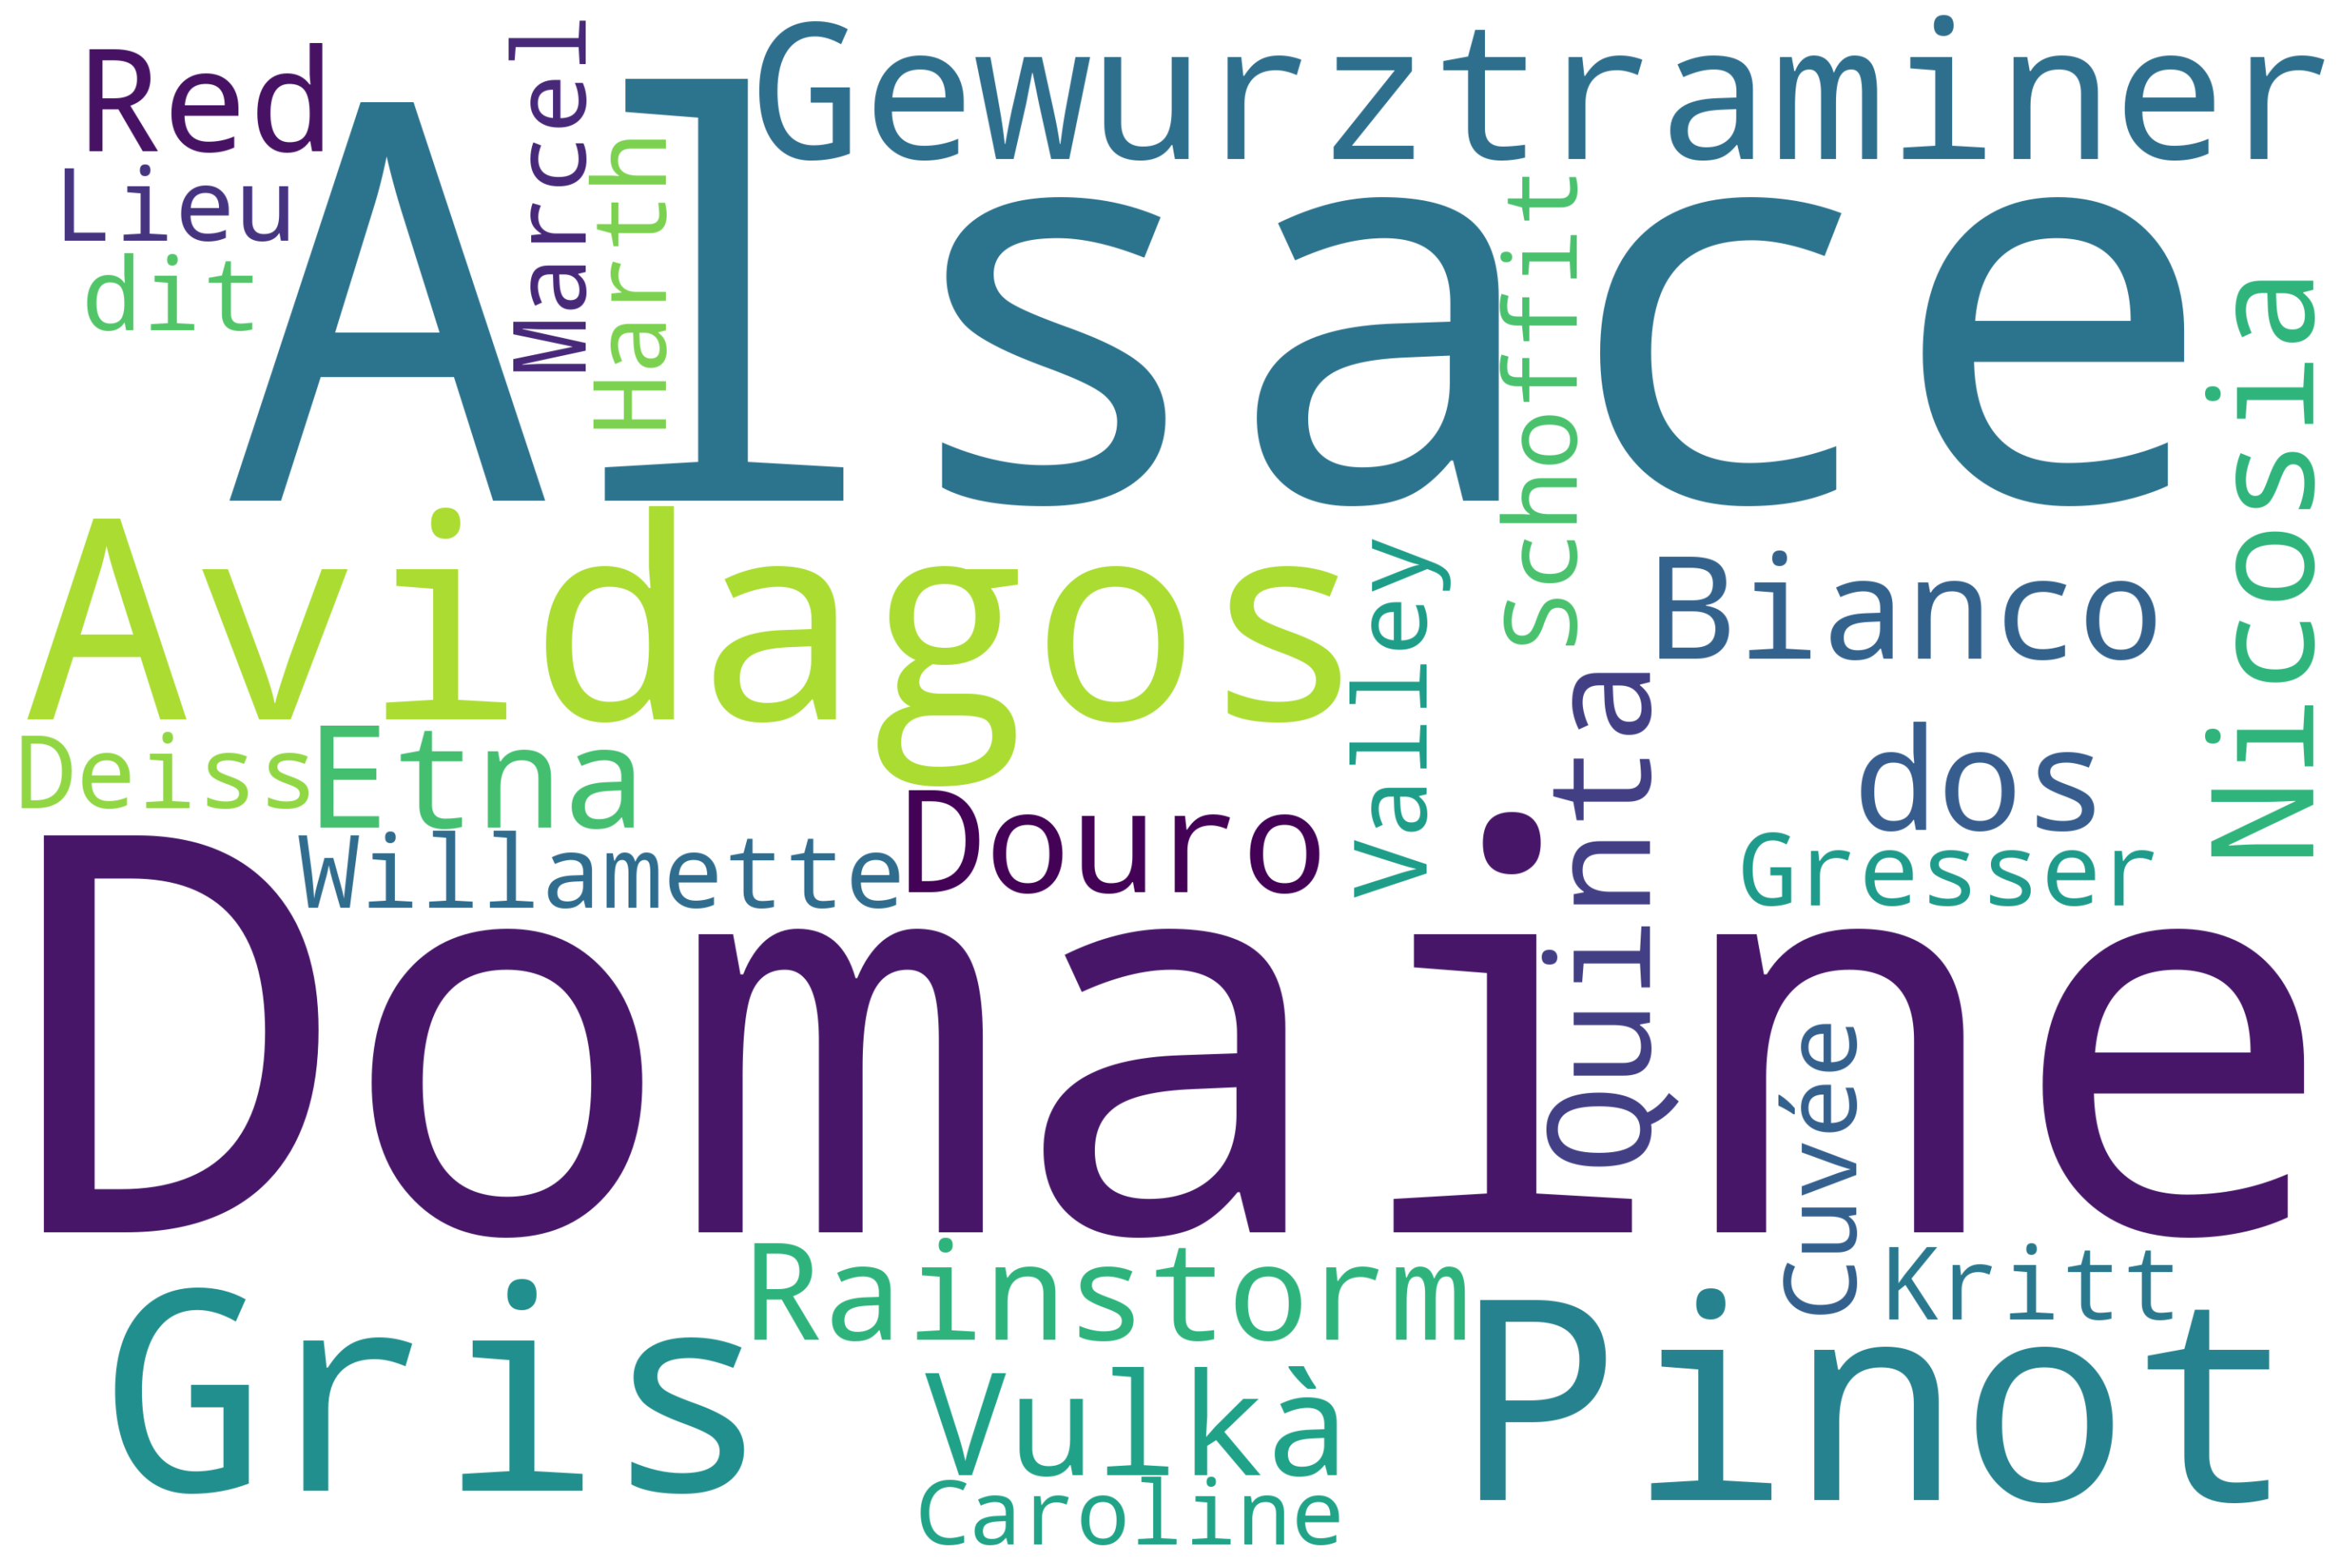

In [299]:
text = df.review_title.values
wordcloud = WordCloud(
    width = 3000,
    height = 2000,
    background_color = 'white',
    stopwords = STOPWORDS).generate(str(text))
fig = plt.figure(
    figsize = (40, 30))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

The review title usually contains the vine name and the province, region_1 and region_2. Hence most used words are Alsaca, Domaine followed by Avidagos, Gris, Pinot.

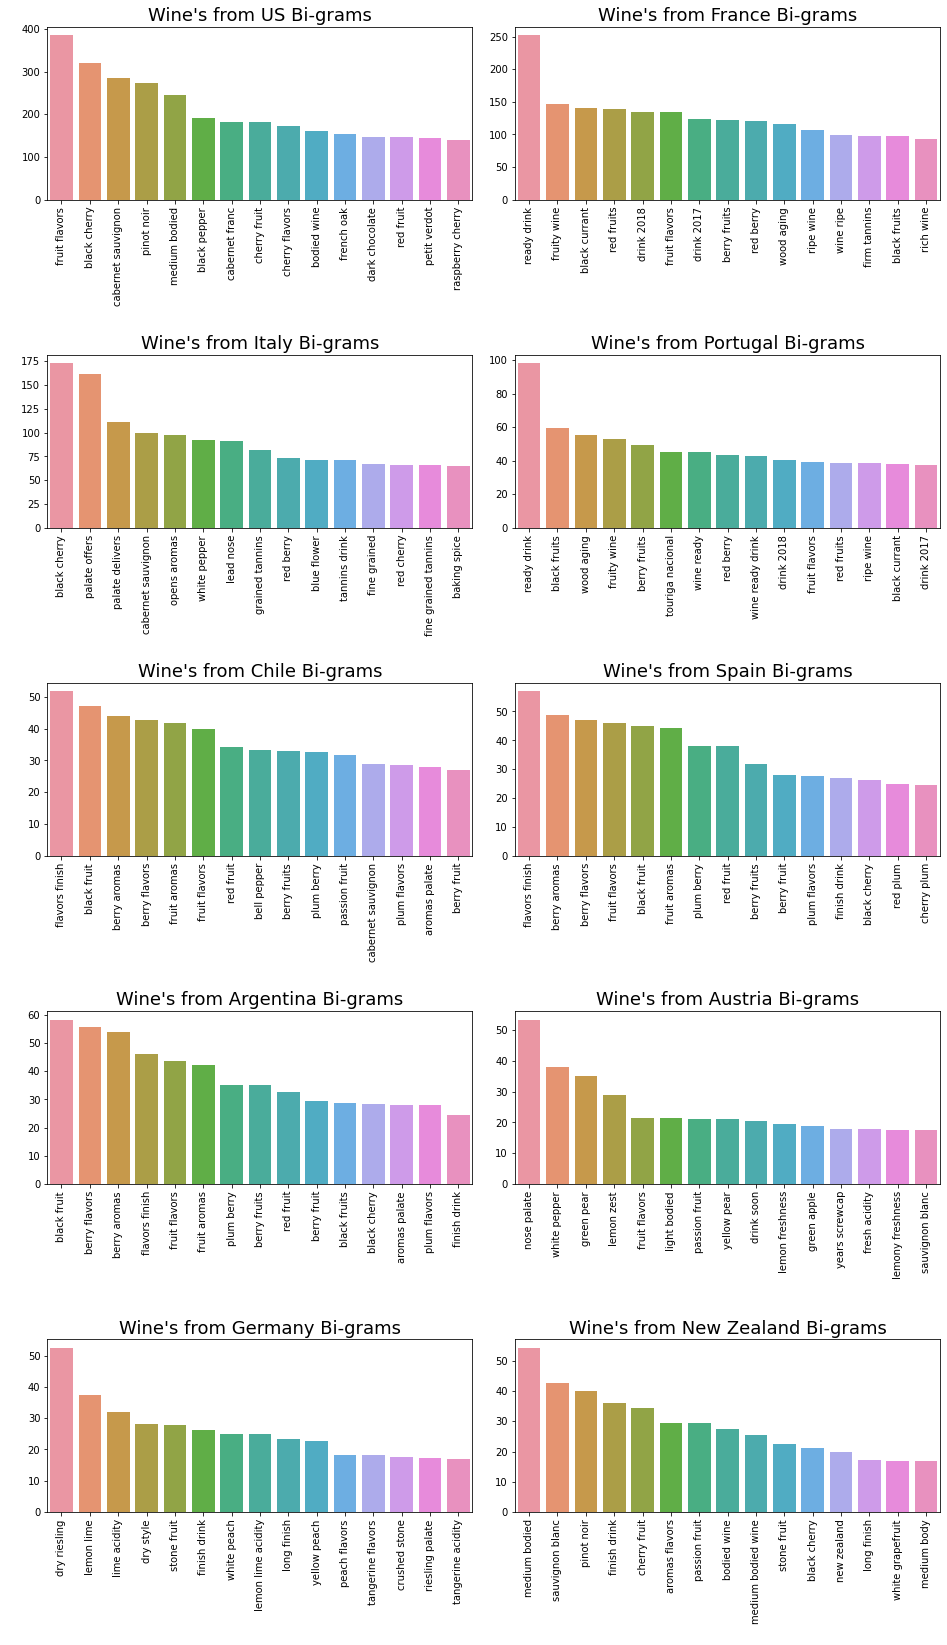

In [418]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import matplotlib.gridspec as gridspec # to do the grid of plots

grid = gridspec.GridSpec(5, 2)
plt.figure(figsize=(16,5*5))

for n, ctry in enumerate(df.country.value_counts()[:10].index):
    
    ax = plt.subplot(grid[n])   

    # Applying TFIDF 
    vectorizer = TfidfVectorizer(ngram_range = (2, 3), max_df=.5,min_df=5, stop_words='english') 
    
    X2 = vectorizer.fit_transform(df.loc[(df.country == ctry)]['review_description']) 
    features = (vectorizer.get_feature_names()) 
    scores = (X2.toarray()) 
    
    # Getting top ranking features 
    sums = X2.sum(axis = 0) 
    data1 = [] 
    
    for col, term in enumerate(features): 
        data1.append( (term, sums[0,col] )) 

    ranking = pd.DataFrame(data1, columns = ['term','rank']) 
    words = (ranking.sort_values('rank', ascending = False))[:15]
    
    sns.barplot(x='term', y='rank', data=words, ax=ax, 
                orient='v')
    ax.set_title(f"Wine's from {ctry} Bi-grams", fontsize=18)
    ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
    ax.set_ylabel(' ')
    ax.set_xlabel(' ')

plt.subplots_adjust(top = 0.95, hspace=.9, wspace=.1)

plt.show()

This is an interesting result. We can observe that the reviews tend to use same wordings. E.g. many US reviewers use 'fruit flavours', 'palate offers'. Similarly many portugal reviewers use 'ready drink' in their reviews. We can look at more number of bigrams used in 10 different countries.

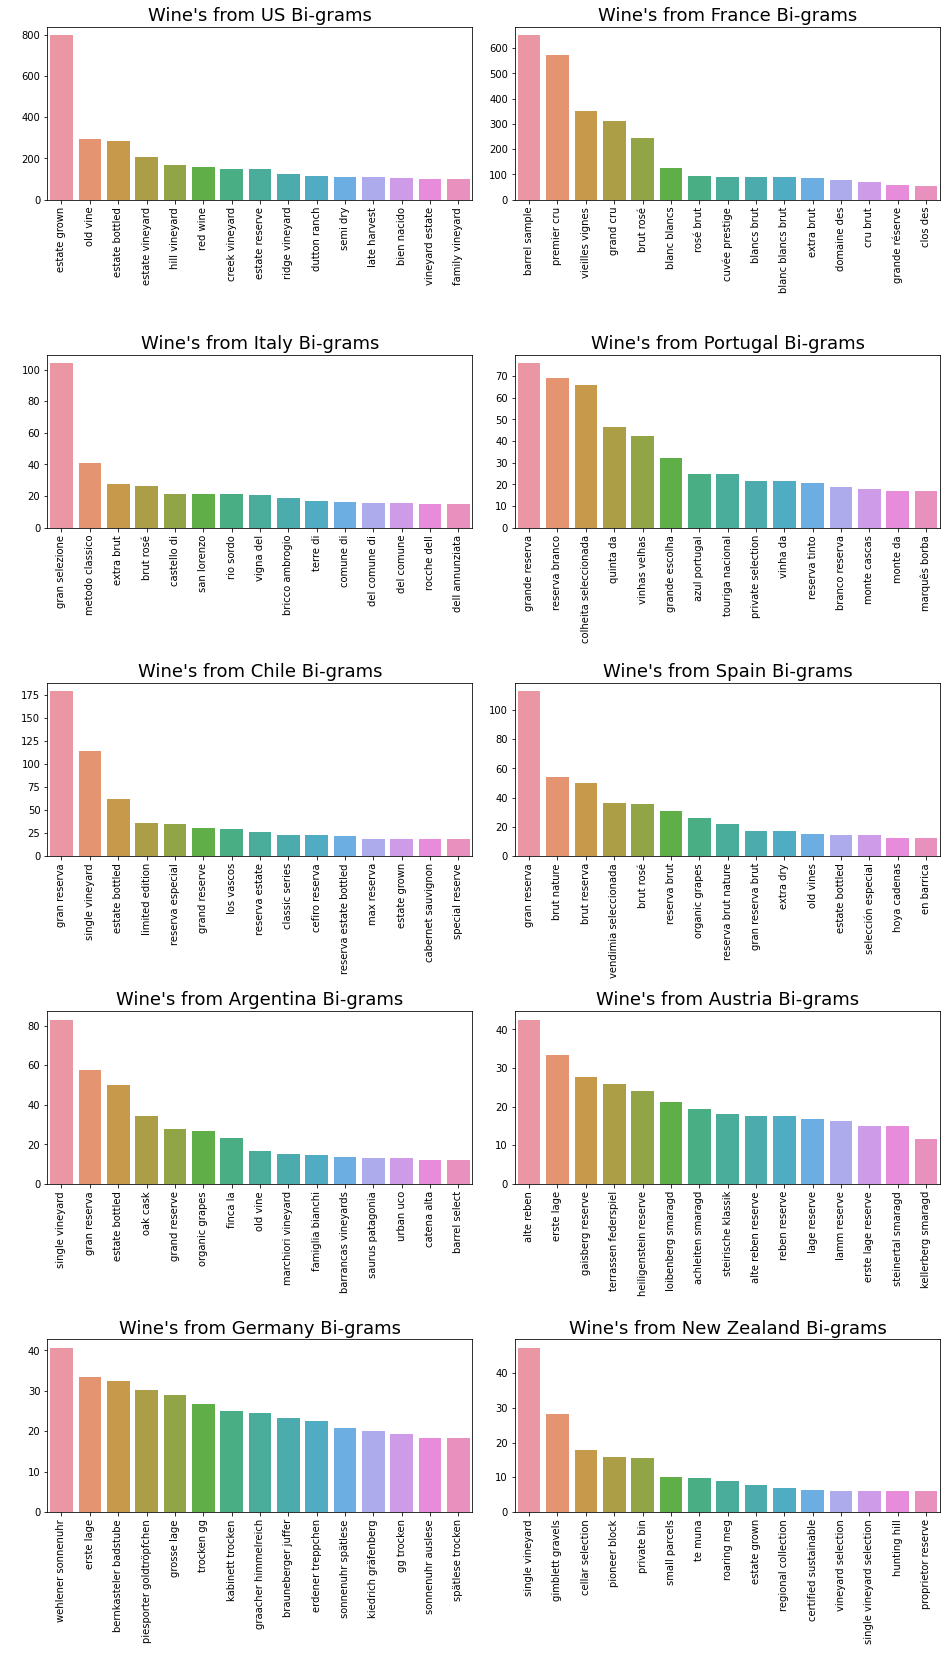

In [417]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import matplotlib.gridspec as gridspec # to do the grid of plots

grid = gridspec.GridSpec(5, 2)
plt.figure(figsize=(16,5*5))

for n, ctry in enumerate(df.country.value_counts()[:10].index):
    
    ax = plt.subplot(grid[n])   

    # Applying TFIDF 
    vectorizer = TfidfVectorizer(ngram_range = (2, 3), max_df=.5,min_df=5, stop_words='english') 
    
    X2 = vectorizer.fit_transform(df.loc[(df.country == ctry)]['designation']) 
    features = (vectorizer.get_feature_names()) 
    scores = (X2.toarray()) 
    
    # Getting top ranking features 
    sums = X2.sum(axis = 0) 
    data1 = [] 
    
    for col, term in enumerate(features): 
        data1.append( (term, sums[0,col] )) 

    ranking = pd.DataFrame(data1, columns = ['term','rank']) 
    words = (ranking.sort_values('rank', ascending = False))[:15]
    
    sns.barplot(x='term', y='rank', data=words, ax=ax, 
                orient='v')
    ax.set_title(f"Wine's from {ctry} Bi-grams", fontsize=18)
    ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
    ax.set_ylabel(' ')
    ax.set_xlabel(' ')

plt.subplots_adjust(top = 0.95, hspace=.9, wspace=.1)

plt.show()

This shows us similar statistics. It looks like bigrams in the designations tend to occur more frequently in most of the reviews as per their country. E.g. estate grown has occured in more than 800 US reviews. Similarly France shows frequent usages of barrel sample and premier cru. No of reviews for rest of the countries is less. But, they show similar behavior.

In [332]:
X = df['review_description']
y = df['variety']

# Vectorizing model
vectorizer = TfidfVectorizer(ngram_range = (2, 3), max_df=.5,min_df=5, stop_words='english') 
vectorizer.fit(X)
X = vectorizer.transform(X)
X

<103282x107456 sparse matrix of type '<class 'numpy.float64'>'
	with 2008157 stored elements in Compressed Sparse Row format>

In [334]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report

In [338]:
# Training model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
rfc = RandomForestClassifier(random_state = 42, verbose=True)
rfc.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:  1.2min finished


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=42,
                       verbose=True, warm_start=False)

In [342]:
# Testing model
predictions = rfc.predict(X_test)
print(classification_report(y_test, predictions))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.8s finished


                            precision    recall  f1-score   support

  Bordeaux-style Red Blend       0.48      0.67      0.56      2047
Bordeaux-style White Blend       0.38      0.14      0.21       328
            Cabernet Franc       0.63      0.30      0.41       388
        Cabernet Sauvignon       0.41      0.59      0.48      2899
           Champagne Blend       0.43      0.19      0.26       396
                Chardonnay       0.48      0.79      0.60      3522
                     Gamay       0.50      0.24      0.32       308
            Gewürztraminer       0.55      0.24      0.33       291
          Grüner Veltliner       0.53      0.42      0.47       357
                    Malbec       0.32      0.23      0.27       777
                    Merlot       0.40      0.14      0.21       931
                  Nebbiolo       0.55      0.51      0.53       830
              Pinot Grigio       0.77      0.44      0.56       326
                Pinot Gris       0.69      0.40

In [363]:
from sklearn.metrics import confusion_matrix

#----- plot confustion matrix function
def show_confusion_matrix(cm):
    plt.figure(figsize=(20, 20))
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.binary)
    plt.title('Confusion matrix',fontsize=30,fontweight="bold")
    plt.set_cmap('Blues')
    plt.colorbar()

    target_names = sorted(df.variety.unique())

    tick_marks = np.arange(len(target_names))
    plt.xticks(tick_marks, target_names, rotation=90,fontsize=20)
    plt.yticks(tick_marks, target_names,fontsize=20)
    plt.ylabel('True label',fontsize=25)
    plt.xlabel('Predicted label',fontsize=25)
    plt.show()



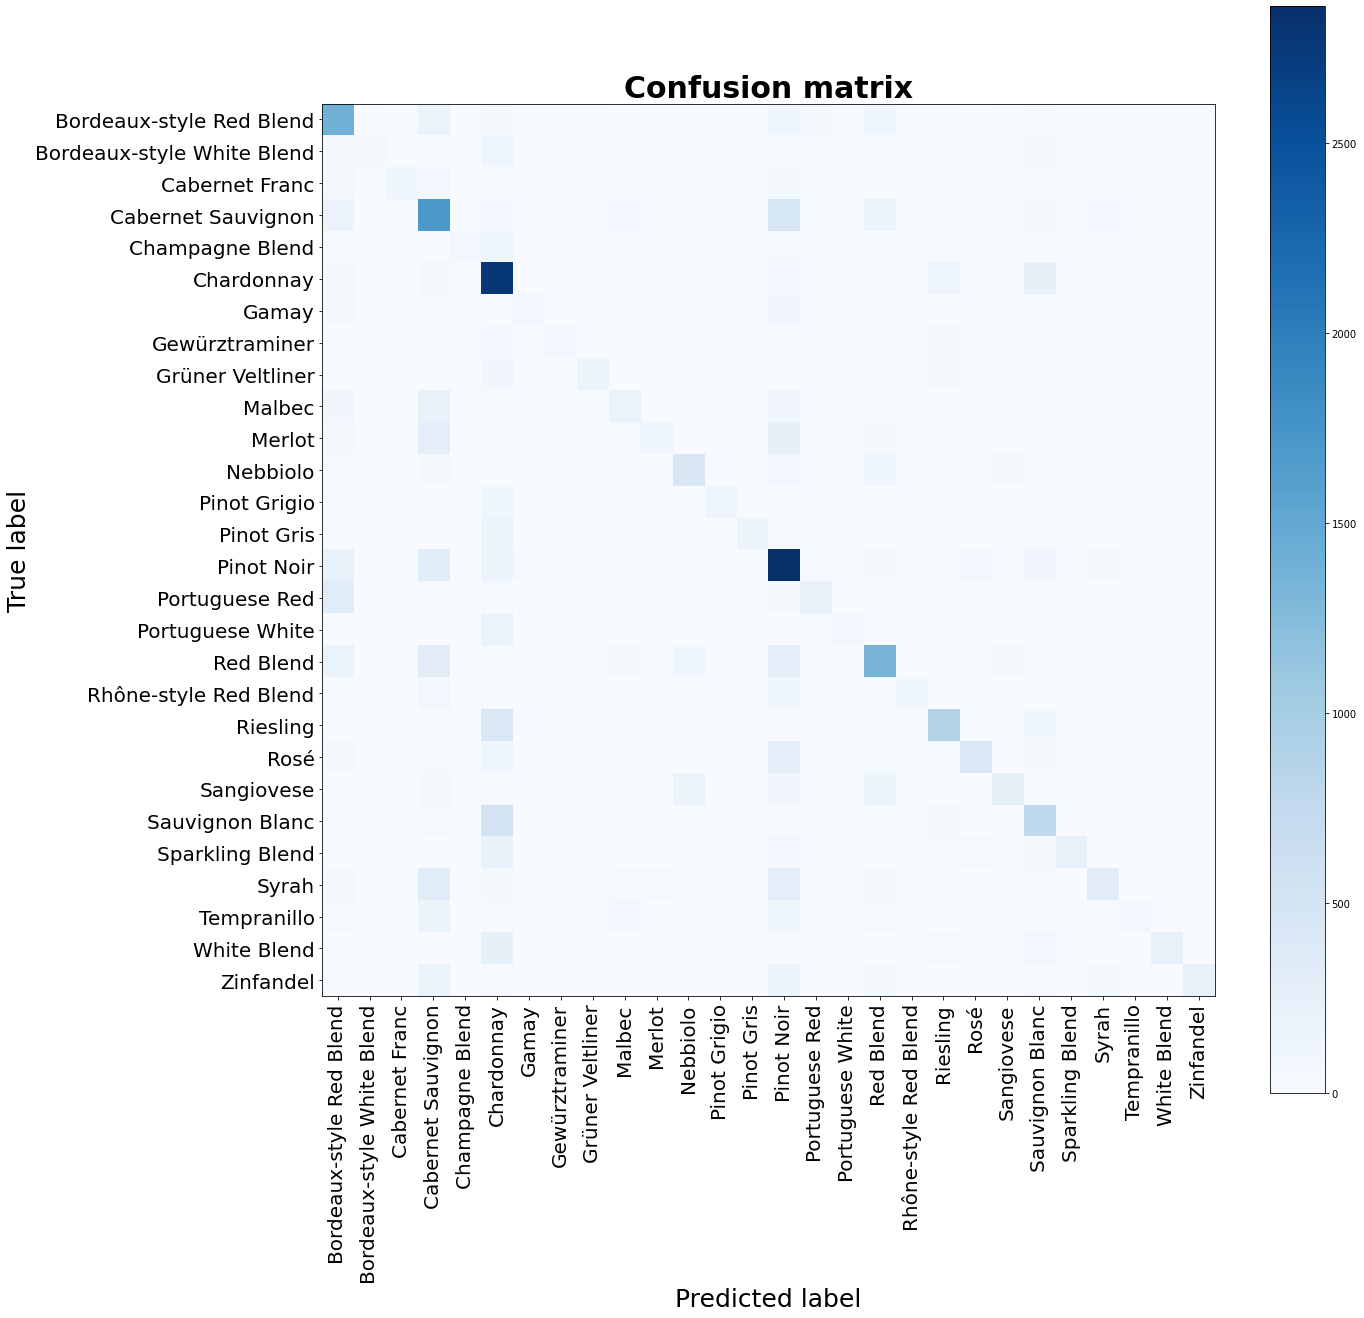

In [364]:
show_confusion_matrix(confusion_matrix(y_test, predictions))

Our model was able to perform significantly well on the Wine variety for which more data was available. i.e. Pinot Noir, Chardonnay and Cabernet Sauvignon.

In [344]:
df.variety.value_counts()/df.shape[0]

Pinot Noir                    0.128473
Chardonnay                    0.113766
Cabernet Sauvignon            0.091691
Red Blend                     0.086511
Bordeaux-style Red Blend      0.066953
Riesling                      0.050222
Sauvignon Blanc               0.048053
Syrah                         0.040104
Rosé                          0.034498
Merlot                        0.030025
Nebbiolo                      0.027149
Zinfandel                     0.026278
Sangiovese                    0.026210
Malbec                        0.025677
Portuguese Red                0.023876
White Blend                   0.022792
Sparkling Blend               0.020846
Tempranillo                   0.017515
Rhône-style Red Blend         0.014233
Pinot Gris                    0.014059
Champagne Blend               0.013516
Cabernet Franc                0.013090
Grüner Veltliner              0.013023
Portuguese White              0.011222
Bordeaux-style White Blend    0.010321
Pinot Grigio             

Considering the probability for the random guessing of a wine variety, I think our model is performing significantly well

# Saving Trained Model

In [365]:
import pickle
pickle.dump(rfc, open("RandomForestClassifier_WineVariety", 'wb'))

In [374]:
pickle.dump(vectorizer, open("tfidf_Vectorizer_wineRatingDescription", 'wb'))

In [367]:
loaded_model = pickle.load(open("RandomForestClassifier_WineVariety", 'rb'))
predictions = loaded_model.predict(X_test)
print(result)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


0.49678876875907696


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.8s finished


# Sample Script for prediction API

In [378]:
# Sample Script to use our model in a real-time Environment

import pickle
from sklearn.ensemble import RandomForestClassifier

loaded_model = pickle.load(open("RandomForestClassifier_WineVariety", 'rb'))
tf_idf = pickle.load(open("tfidf_Vectorizer_wineRatingDescription", 'rb'))

while True:
    s = input().strip()
    X = tf_idf.transform([s])
    prediction = loaded_model.predict(X)
    print(prediction)

This dry and restrained wine offers spice in profusion. Balanced with acidity and a firm texture, it's very much for food.
['Gewürztraminer']


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished


## Testing The API

In [ ]:
from random import randrange

In [387]:
randomIndex = randrange(df.shape[0])

print(df.review_description[randomIndex])
print(df.variety[randomIndex])

Aromas like black pepper and red cherries, and flavors like lightly sweet strawberries give this medium-bodied wine a lot to like, besides the very affordable price. It has just a touch of tannin to add some good texture.
Cabernet Sauvignon


'Cabernet Sauvignon'